# Анализ данных по интернет-магазину

## Описание проекта <a class="anchor" id="first-bullet"></a>

Интернет-магазин «Стримчик», продаёт по всему миру компьютерные игры. Из открытых источников нам доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

У нас имеются данные до 2016 года. Необходимо спланировать кампанию на 2017-й.

* [Описание проекта](#first-bullet)
* [Общая информация о файлах и их структура](#second-bullet)
* [Предобработка данных](#third-bullet)
* [Исследовательский анализ данных](#fourth-bullet)
* [Портрет пользователя каждого региона](#fifth-bullet)
* [Проверка статистических гипотез](#sixth-bullet)
* [Общий вывод](#seventh-bullet)

## Общая информация о файле и его структура <a class="anchor" id="second-bullet"></a>

In [1]:
# Импортируем необходимые для работы библиотеки

import math
import numpy as np
import pandas as pd
from IPython.display import display
from scipy import stats as st
from sklearn.linear_model import LinearRegression

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

%matplotlib inline

У нас имеется один файл формата csv, откроем его, и ознакомимся со структурой файла.

In [4]:
def load_df(name_of_df, separator=",", ind=None):
    """Функция загружает датафрэйм и выводит основные данные по нему.
    Аргументы:
    name_of_df - путь к датафрэйму;
    separator - разделитель;
    ind - столбцы для использования в качестве номеров строк"""

    # Считаем и выведем первые 5 строк таблицы
    df = pd.read_csv(name_of_df, sep=separator, index_col=ind)
    print("Выведем первые 5 строк таблицы:", end="\n\n")
    display(df.head())

    # Вывод основных описательных статистик, общей информации о таблице,
    # пропущенных значений, корреляции признаков, количества дубликатов в данных
    print(
        "\n\n\n\nОтобразим основные описательные статистики по признакам:", end="\n\n"
    )
    display(df.describe())
    print("\n\n\n\nПолучим общую информацию о таблице:", end="\n\n")
    display(df.info())
    print(f"\n\n\n\nПропущенные значения по признакам:", end="\n\n")
    display(pd.DataFrame(df.isnull().sum(), columns=["missing_values"]))
    print(f"\n\n\n\nКорреляция признаков:", end="\n\n")
    display(df.corr())
    return df

In [5]:
games_df = load_df("games.csv")

Выведем первые 5 строк таблицы:



,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN






Отобразим основные описательные статистики по признакам:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000






Получим общую информацию о таблице:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None





Пропущенные значения по признакам:



,missing_values
Name,2
Platform,0
Year_of_Release,269
Genre,2
NA_sales,0
EU_sales,0
JP_sales,0
Other_sales,0
Critic_Score,8578
User_Score,6701






Корреляция признаков:



,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
Year_of_Release,1.000000,-0.092500,0.003978,-0.168366,0.037820,0.011411
NA_sales,-0.092500,1.000000,0.765335,0.449594,0.638649,0.240755
EU_sales,0.003978,0.765335,1.000000,0.435061,0.722792,0.220752
JP_sales,-0.168366,0.449594,0.435061,1.000000,0.291089,0.152593
Other_sales,0.037820,0.638649,0.722792,0.291089,1.000000,0.198554
Critic_Score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


Таблица состоит из 16715 строк и 11 колонок. Разберём, какие имеются столбцы, и какую информацию они содержат:

> Name — название игры<br>
> Platform — платформа<br>
> Year_of_Release — год выпуска<br>
> Genre — жанр игры<br>
> NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
> EU_sales — продажи в Европе (миллионы проданных копий)<br>
> JP_sales — продажи в Японии (миллионы проданных копий)<br>
> Other_sales — продажи в других странах (миллионы проданных копий)<br>
> Critic_Score — оценка критиков (максимум 100)<br>
> User_Score — оценка пользователей (максимум 10)<br>
> Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Составим краткий план работы над проектом:

1. выполнить предобработку данных;
2. провести исследовательский анализ данных;
3. получить портрет пользователя каждого региона;
4. выпоолнить проверку статистических гипотез;
5. написать общий вывод.

### Вывод

Мы получили одну таблицу с данными, которая содержит 16 715 строк и 11 колонок.

Также мы заметили, что в данных имеются пропущенные значения, которые мы обработаем на этапе предобработки данных. Причиной пропусков могли послужить технические неполадки при хранении, обработке или выгрузки данных. Также в случае со столбцом user score пропуски могут быть из-за недостаточного количества оценок пользователей.

## Предобработка данных <a class="anchor" id="third-bullet"></a>

На данном этапе нам предстоит выолнить следующие задачи:

1. Заменить названия столбцов (приведите к нижнему регистру);
2. Преобразовать данные в нужные типы и описать причины именно такого преобразования;
3. Обработать пропуски при необходимости:
*   Объяснить, почему заполнили пропуски определённым образом или почему не стали это делать;
*   Описать причины, которые могли привести к пропускам;
*   Обратить внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разобрать это значение и описать, как его обработать;
4.   Посчитать суммарные продажи во всех регионах и записать их в отдельный столбец.

Для начала зададим корректные наименования столбцов, приведя их к нижнему регистру.

In [6]:
def rename_columns_lower(dataframe):
    """Функция принимает на вход датафрэйм, проверяет на
    то, что все столбцы содержат только символы нижнего регистра.
    В противном случае приводит наименования колонок к нижнему регистру.
    Аргументы:
    dataframe - таблица с данными"""

    new_columns = list(map(str.lower, dataframe.columns))
    if list(dataframe.columns) == new_columns:
        return dataframe
    for number, column in enumerate(games_df.columns):
        dataframe = dataframe.rename(columns={column: new_columns[number]})
    return dataframe

In [7]:
games_df = rename_columns_lower(games_df)

In [8]:
# Проверим корректность преобразований

games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [9]:
# Повторно посчитаем число пропусков

games_df.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Мы видим, что число пропусков в переменной user_score выросло. Это связано с тем, что мы заменили занчения 'tbd' на NaN.

Прежде чем мы приступим к этапу обработки пропусков, попытаемся понять, откуда они появились. Во-первых, пропуски могут быть следствием технической неисправности на этапе сбора, обработки или же выгрузки данных. Вероятнее всего, пропуски данного типа характерны для пропусков в переменных 'name', 'year_of_release', 'genre', 'rating', и предположим, что они возникли на этапе выгрузки данных, т.к. трудно представить, что в интернет-магазине по продаже игр не отображается наименование игры, год ее релиза, жанр или же возрастной рейтинг. Механизм формирования пропусков в таком случае можно отнести к MNAR (Missing Not At Random) — механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. MNAR предполагает, что вероятность пропуска могла бы быть описана на основе других атрибутов, но информация по этим атрибутам в наборе данных отсутствует.

По поводу переменных 'critic_score', 'user_score' сложно однозначно сказать, что является причиной пропусков: это может быть, как мы упомянули ранее, недостаточное количество отзывов и оценок для определения средней оценки (например, на сайте может стоять условие, что средняя оценка выводится лишь в том случае, если число отзывов более определенного количества), полное отсутствие отзывов и оценок, и в таком случае механизм формирования пропусков для переменной 'user_score' можно отнести к MAR (Missing At Random) — данные обычно пропущены не случайно, а ввиду некоторых закономерностей: недостаточной популярности игры.

Однако, в случае с переменной 'critic_score' все же предположим, что проппуски также появились ввиду проблемы с обработкой или выгрузкой данных, т.к. различные игровые журналы и критики пишут рецензии на все игры, даже на самые скромные инди-проекты, и в данном случае также имеет место механизм формирования пропусков MNAR (Missing Not At Random).

Приступим к обработке пропусков. Как мы видим, пропущенных значений в наименовании всего 2, выведем эти наблюдения.

In [10]:
games_df.loc[games_df.name.isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


В этих наблюдениях пропущены значения в нескольких столбцах: name, genre, critic_score, user_score, rating, и от них лучше избавиться, т.к. мы не сможем однозначно идентифицировать, о каких играх идет речь.

In [11]:
games_df = games_df[games_df.name.notna()]

In [12]:
games_df.isnull().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Мы имеем 269 пропусков в переменной year_of_release. Есть несколько вариантов, что можно сделать с пропусками в переменной 'year_of_release'. Самый простой вариант - избавиться от таких наблюдений. Однако, в таком случае, мы можем потерять важные значения, поэтому такой вариант отклоняем. 

В случае, если переменная 'year_of_release' достаточно сильно коррелирует с какой-нибудь другой переменной, можно попробовать заполнить пропущенные значения с помощью линейной регрессии. Построим матрицу корреляций.

In [13]:
games_df.corr()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
year_of_release,1.000000,-0.092326,0.004045,-0.168477,0.037821,0.011411
na_sales,-0.092326,1.000000,0.765341,0.449668,0.638695,0.240755
eu_sales,0.004045,0.765341,1.000000,0.435079,0.722796,0.220752
jp_sales,-0.168477,0.449668,0.435079,1.000000,0.291090,0.152593
other_sales,0.037821,0.638695,0.722796,0.291090,1.000000,0.198554
critic_score,0.011411,0.240755,0.220752,0.152593,0.198554,1.000000


Мы видим, что сильной корреляции между переменной 'year_of_release' и какой-либо еще нет. Однако, мы обнаружили небольшую корреляцию (в данном случае обратную зависимость) переменных 'year_of_release' и 'user_score'. Выдвинем забавную гипотезу о том, почему так происходит: с каждым годом игры становятся все более казуальными (легкими), что не нравится хардкорным игрокам, и люди со словами "раньше было лучше" ставят играм более низкие оценки. Или же требования игроков к играм ввиду развития технологий постоянно повышаются, и оценки становятся строже. Еще одной причиной может быть система доната (donate — это добровольная оплата в виде материального или финансового вознаграждения), которую вводят в своих играх все больше компаний, и это не может не расстраивать игроков.

Значения корреляций достаточно низкие, поэтому необходимо выполнить другой способ заполнения. Однако, можно заполнить пропущенные значения переменной 'year_of_release' медианным значением переменной 'year_of_release' после группировки датафрэйма по переменной 'name', т.к. многие игры повторяются, но с разными платформами и, вероятно, что в каких-то из наблюдений по одной и той же игре все же есть заполненные значения.

In [14]:
games_df.loc[games_df.year_of_release.isnull(), "year_of_release"] = games_df.groupby(
    "name"
)["year_of_release"].apply(lambda x: x.fillna(x.median()))

In [15]:
# Проверим получившиеся преобразования

games_df.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Мы избавились от ряда пропусков в переменной 'year_of_release'. Как вариант, от оставшейся части пропусков можно избавиться, сгруппировав данные по переменной platform, и взяв медианное значение года по каждой платформе, однако, такой подход достаточно груб, и исказит реальные данные. Оставшуюся часть пропусков оставим без изменений.

У нас имеется 2 424 наблюдения, где значение переменной user_score - 'tbd'. Оно расшифровывается как to be determined, что в переводе означает "будет определено". Вероятнее всего, играм с такой меткой ни один пользователь не поставил оценку, или же задан алгоритм, что средняя оценка отображается лишь в том случае, если общее число оценок не меньше, например, 5 шт. В данном случае можно заменить значения tbd на NaN: это не исказит результаты и будет означать то же самое - пропуск в данных.

In [16]:
def obj_to_float(x):
    """Функция сравнивает значение в ячейке
    со значением 'tbd' и в случае неравенства 
    переводит в тип float"""

    if x == "tbd":
        return np.nan
    return float(x)

In [17]:
games_df.loc[:, "user_score"] = games_df.loc[:, "user_score"].apply(obj_to_float)

Далее приведем значения переменной user_score к одному масштабу с переменной critic_score.

In [18]:
games_df.loc[:, "user_score"] = games_df.loc[:, "user_score"].apply(lambda x: x * 10)

In [19]:
# Проверим получившиеся преобразования

games_df.isnull().sum()

name                  0
platform              0
year_of_release     146
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         9123
rating             6764
dtype: int64

К сожалению, к такому методу лучше не прибегать в случае с critic score или user score, ведь оценки пользователей или критиков по одной и той же игре могут существенно отличаться на разных платформах.

Далее посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [20]:
games_df["total_sales"] = games_df[
    ["na_sales", "eu_sales", "jp_sales", "other_sales"]
].apply(sum, axis=1)

In [21]:
games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,80.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,83.0,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,80.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


In [22]:
def float_to_int(df, columns, ceil=False):
    """Функция переводит значения в тип данных int.
    Аргументы:
    df - таблица с данными
    columns - наименование столбца, значения которого нужно перевести в тип int
    ceil - необходимость округления значений вверх"""

    if ceil:
        for column in columns:
            df.loc[:, column] = (
                df.loc[:, column].apply(lambda x: math.ceil(x)).astype("int")
            )
    else:
        for column in columns:
            try:
                df.loc[:, column] = df.loc[:, column].astype("int")
            except:
                try:
                    df.loc[:, column] = df.loc[:, column].astype("Int64")
                except:
                    df.loc[:, column] = pd.to_numeric(
                        df.loc[:, column].round(), errors="coerce"
                    ).astype("Int64")

Замену типа int на float лучше не выполнять, т.к. в столбцах, где есть пропущенные значения NaN, можно лишь выполнить замену на тип Int64, но, в таком случае мы будем часто сталкиваться с проблемами при построении графиков с помощью библиотеки seaborn. Поэтому этап преобразования данных во избежании проблем пропустим, несмотря на то, что мы написали для этого довольно удобную фунцию.

### Вывод

Мы выполнили предобработку данных: 

> привели наименования столбцов к нижнему регистру; <br>
> выполнили обработку пропусков;<br>
> посчитали суммарные продажи во всех регионах.<br>

Как мы отметили выше, в основном пропуски были сформированы по механизму MNAR (Missing Not At Random) — механизм формирования пропусков, при котором данные отсутствуют в зависимости от неизвестных факторов. MNAR предполагает, что вероятность пропуска могла бы быть описана на основе других атрибутов, но информация по этим атрибутам в наборе данных отсутствует.

Пропуски заполнялись, исходя из того, что некоторые игры повторялись. Это связано с тем, что они выходили на нескольких платформах, и продажи по ним различались. В таком случае, если хотя бы у одного такого наблюдения имеется заполненное значение (а у других там пропуски), то мы все строки по этой игре заполняли этим непропущенным значением с помощи функции groupby.

Стоит отметить, что у нас по-прежнему остались пропущенные значения. Однако, адекватно их обработать, не исказив распределения по переменным, не представляется возможным, поэтому лучшим вариантом будет оставить данные значения без изменений.

## Исследовательский анализ данных <a class="anchor" id="fourth-bullet"></a>

Проведем исследовательский анализ данных. Посмотрим, сколько игр выпускалось в разные годы и важны ли данные за все периоды.

In [23]:
def hist(dataframe, clmn, bns, without_outliers=False, rng=None):
    """Функция автоматизирует построение графика hist. 
    Для наглядности при without_outliers=True
    взяли не 1,5 межквартильных размаха, а 2"""
    if not rng and without_outliers:
        Q1 = dataframe[clmn].quantile(0.25)
        Q3 = dataframe[clmn].quantile(0.75)
        IQR = Q3 - Q1
        a = max(Q1 - 2 * IQR, dataframe[clmn].min())
        b = Q3 + 2 * IQR
        rng = (a, b)

    dataframe.plot(
        kind="hist",
        y=clmn,
        bins=bns,
        legend=True,
        range=rng,
        grid=True,
        figsize=(15, 6),
    )
    name = clmn
    try:
        name = name.split("_")
        name = " ".join(name)
        plt.xlabel(f"{name} values")
    except:
        plt.xlabel(f"{name} values")
    if without_outliers:
        plt.title(f"Histogram of {name} without outliers")
    else:
        plt.title(f"Histogram of {name}")
    plt.show()

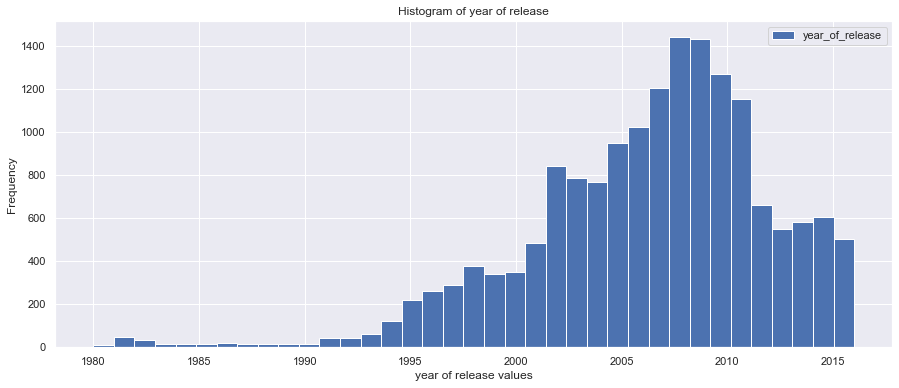

In [24]:
hist(games_df, "year_of_release", 37)

Мы видим, что до 2000х годов игр выпускалось относительно немного. С течением времени появлялось больше игровых студий и число релизов росло. Однако, также можно заметить, что после 2010 года наблюдается снижение числа релизов. Это может быть связано с тем, что к играм предъявляются все большие требования, и процесс их создания становится все более технически сложным, поэтому, возможно, разработчикам требуется больше времени.

Можно предположить, что целесообразнее поделить данные на 5-летние периоды, и на основании этого судить о числе выпусков игр.

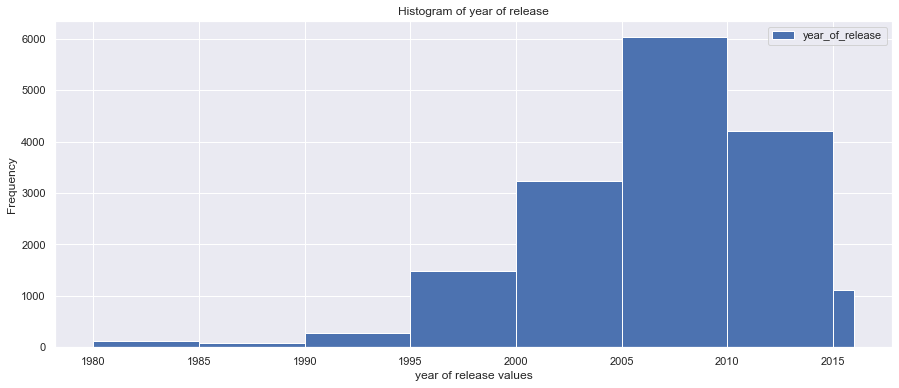

In [25]:
hist(
    games_df, "year_of_release", [1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2016]
)

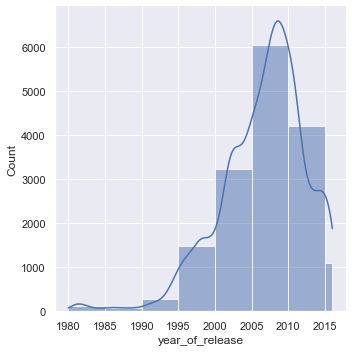

In [26]:
sns.displot(
    games_df,
    x="year_of_release",
    kde=True,
    bins=[1980, 1985, 1990, 1995, 2000, 2005, 2010, 2015, 2016],
)

Анализировать такой график гораздо удобнее: мы видим унимодальное распределение с вершиной в 2010 годах, и похоже, распределение немного скошенно вправо.

Далее посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим, за какой характерный срок появляются новые и исчезают старые платформы.

In [27]:
total_sales_by_platform = (
    games_df.pivot_table(index=["platform"], values="total_sales", aggfunc="sum")
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

Text(0.5, 1.0, 'Sales per platform')

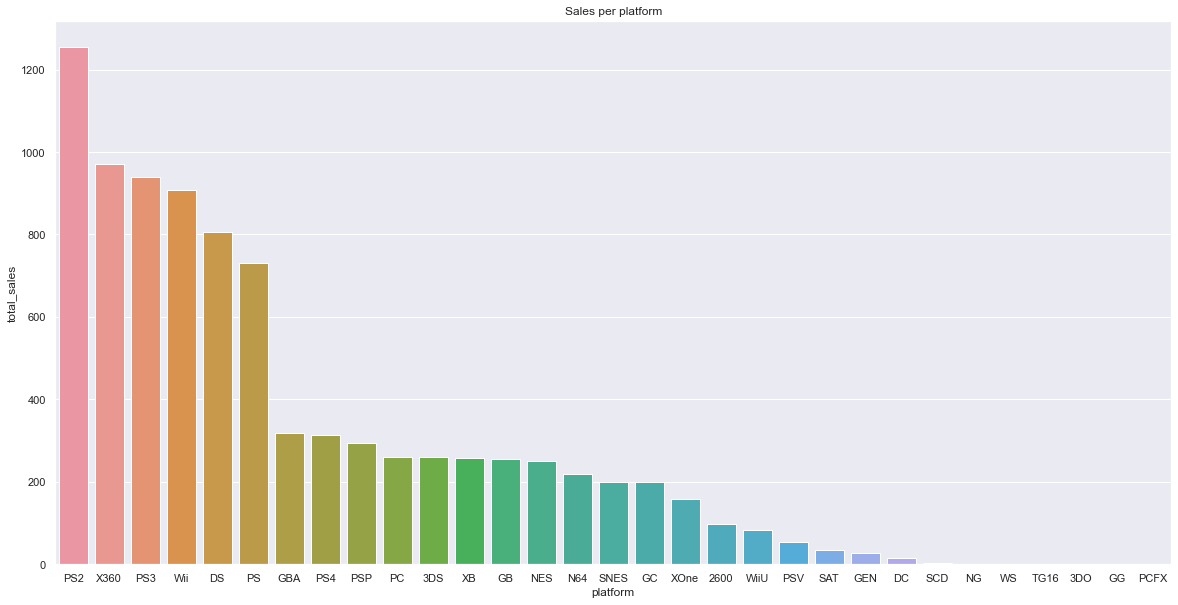

In [28]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    y=total_sales_by_platform.total_sales,
    x=total_sales_by_platform.platform,
    orient="v",
)
ax.set_title("Sales per platform")

Таким образом, можно выделить игровые платформы, по которым продалось наибольшее число копий: PS2, X360, PS3, Wii, DS, PS, GBA, PS4, PSP, PC. Далее определим, за какой характерный срок появляются новые и исчезают старые платформы. Нет смысла анализировать все консоли, поэтому рассмотрим линейки SonyPlaystation (PS, PS2, PS3, PS4) и Nintendo (GBA, DS).

In [29]:
top_10_total_sales_by_platform = (
    games_df[
        games_df.platform.isin(
            ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]
        )
    ]
    .pivot_table(
        index=["platform", "year_of_release"], values="total_sales", aggfunc="sum"
    )
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

In [30]:
top_10_total_sales_by_platform

,platform,year_of_release,total_sales
60,PS2,2004.0,212.76
58,PS2,2002.0,208.36
100,Wii,2009.0,206.97
59,PS2,2003.0,193.05
99,Wii,2008.0,177.68
...,...,...,...
96,PSP,2015.0,0.12
11,GBA,2000.0,0.07
19,PC,1985.0,0.04
20,PC,1988.0,0.03


Сначала визуализируем данные, а затем воспользуемся методом describe, чтобы получить минимальные значения, значения первого квартиля, медианы, третьего квартиля и максимальное значение релиза игр для выбранных платформ.

Text(0.5, 1.0, 'Sales per years')

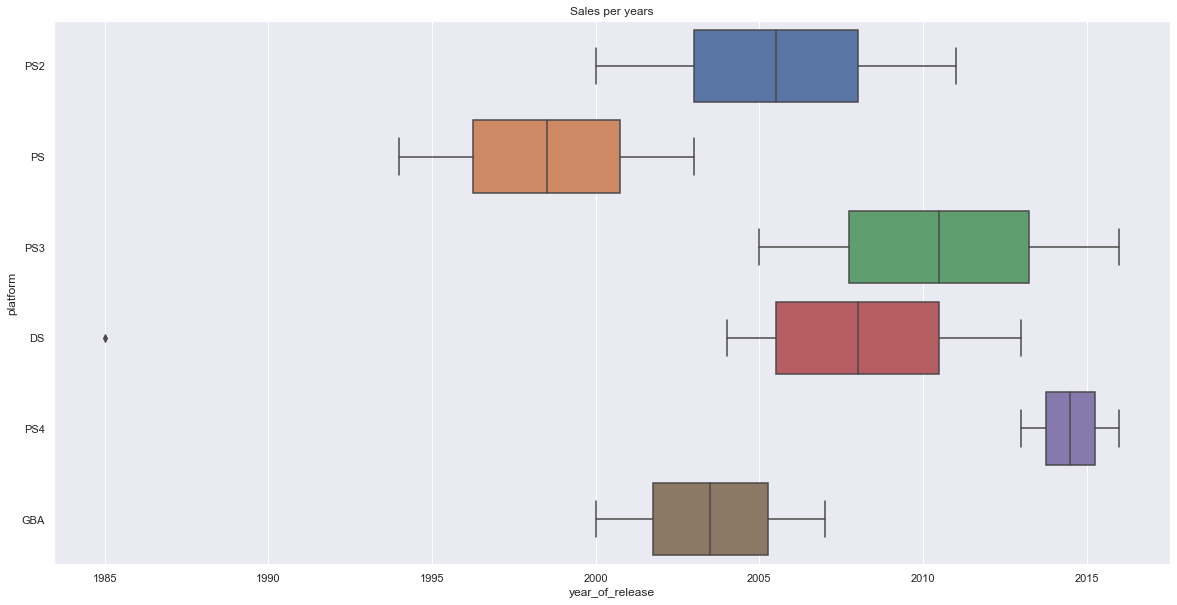

In [31]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(
    x="year_of_release",
    y="platform",
    data=top_10_total_sales_by_platform[
        top_10_total_sales_by_platform.platform.isin(
            ["PS", "PS2", "PS3", "PS4", "GBA", "DS"]
        )
    ],
)
ax.set_title("Sales per years")

Мы заметили странное значение по платформе DS. Nintendo DS вышла в 2004 году, однако, у нас имеется наблюдение, где игра на DS вышла аж в 1985 году, найдём это наблюдение.

In [32]:
games_df[(games_df.platform == 'DS') & (games_df.year_of_release == 1985)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
15957,Strongest Tokyo University Shogi DS,DS,1985.0,Action,0.0,0.0,0.02,0.0,NaN,NaN,NaN,0.02


Скорее всего произошла ошибка, т.к. вряд ли в 1985 году могли выпустить игру для игровой платформы 2004 года. Избавимся от этого наблюдения.

In [33]:
games_df = games_df.loc[games_df.name != "Strongest Tokyo University Shogi DS"]

In [34]:
top_10_total_sales_by_platform = (
    games_df[
        games_df.platform.isin(
            ["PS2", "X360", "PS3", "Wii", "DS", "PS", "GBA", "PS4", "PSP", "PC"]
        )
    ]
    .pivot_table(
        index=["platform", "year_of_release"], values="total_sales", aggfunc="sum"
    )
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

Далее получим числовые значения с помощью метода describe. В качестве срока жизни консоли можно взять значения от выхода первой игры на нее до выхода последней игры на нее.

In [35]:
for platform in ["PS", "PS2", "PS3", "PS4", "GBA", "DS"]:
    print(platform)
    display(top_10_total_sales_by_platform[top_10_total_sales_by_platform.platform == platform].describe())

PS


,year_of_release,total_sales
count,10.00000,10.000000
mean,1998.50000,72.758000
std,3.02765,63.351713
min,1994.00000,2.070000
25%,1996.25000,13.900000
50%,1998.50000,65.330000
75%,2000.75000,126.220000
max,2003.00000,169.490000


PS2


,year_of_release,total_sales
count,13.000000,13.000000
mean,2005.500000,95.935385
std,3.452053,82.455281
min,2000.000000,0.250000
25%,2003.000000,26.400000
50%,2005.500000,76.100000
75%,2008.000000,166.430000
max,2011.000000,212.760000


PS3


,year_of_release,total_sales
count,12.000000,12.000000
mean,2010.500000,77.932500
std,3.605551,57.769741
min,2005.000000,0.190000
25%,2007.750000,20.285000
50%,2010.500000,90.735000
75%,2013.250000,121.825000
max,2016.000000,157.980000


PS4


,year_of_release,total_sales
count,4.000000,4.000000
mean,2014.500000,78.535000
std,1.290994,40.567917
min,2013.000000,25.990000
25%,2013.750000,58.435000
50%,2014.500000,84.625000
75%,2015.250000,104.725000
max,2016.000000,118.900000


GBA


,year_of_release,total_sales
count,8.00000,8.000000
mean,2003.50000,39.216250
std,2.44949,32.727199
min,2000.00000,0.070000
25%,2001.75000,4.945000
50%,2003.50000,45.600000
75%,2005.25000,64.687500
max,2007.00000,77.910000


DS


,year_of_release,total_sales
count,10.00000,10.000000
mean,2008.50000,80.426000
std,3.02765,59.742914
min,2004.00000,1.540000
25%,2006.25000,19.535000
50%,2008.50000,102.455000
75%,2010.75000,127.557500
max,2013.00000,147.230000


Как правило, срок жизни консолей от момента выхода первой игры на консоль до выхода последней - 8-12 лет. Примем среднее значение из этого диапазона в 10 лет.

Для прогноза на 2017 год определим актуальный период. Очевидно, что игры для PS в 2017 году уже покупать никто не станет. Актуальными платформами являются PS4, XOne, которые вышли в 2013-2014 годах. В качестве актуального периода целесообразно выбрать все, что было продано в 2012 году и позже. Проанализируем, по каким платформам продавались игры, начиная с 2010 года.

In [36]:
# Отсеим игры, которые вышли раньше 2012 года

actual_games_df = games_df.loc[games_df["year_of_release"] >= 2012]

In [37]:
actual_games_df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013.0,Action,7.02,9.09,0.98,3.96,97.0,82.0,M,21.05
23,Grand Theft Auto V,X360,2013.0,Action,9.66,5.14,0.06,1.41,97.0,81.0,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015.0,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013.0,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,4.99,5.73,0.65,2.42,83.0,53.0,M,13.79


In [38]:
actual_total_sales_by_platform = (
    actual_games_df.pivot_table(index=["platform"], values="total_sales", aggfunc="sum")
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

Text(0.5, 1.0, 'Sales by platform')

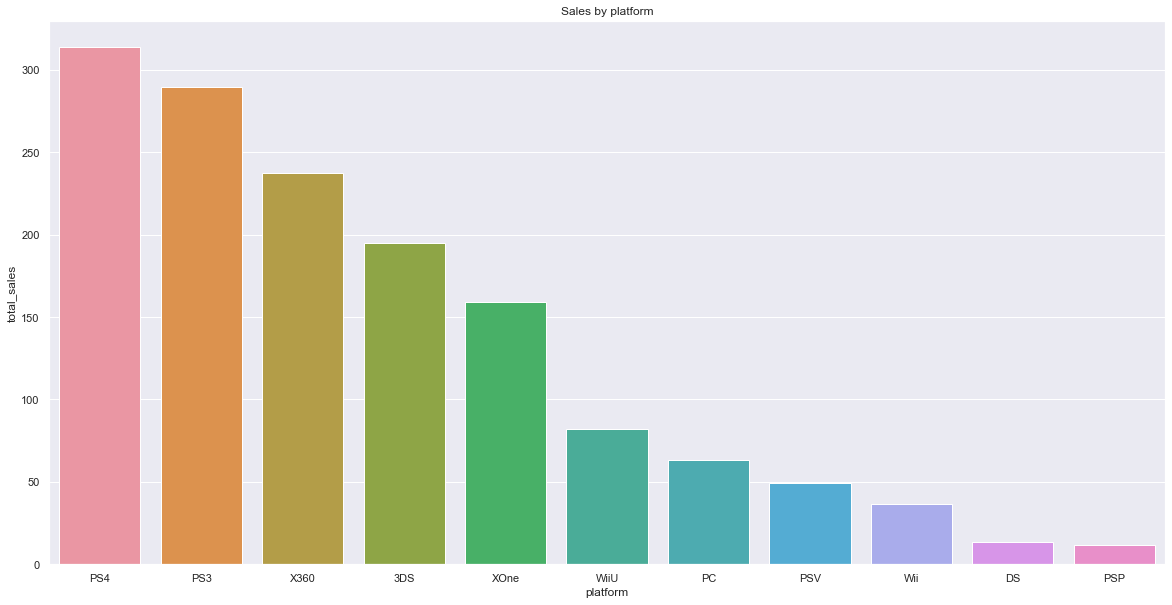

In [39]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(
    y=actual_total_sales_by_platform.total_sales,
    x=actual_total_sales_by_platform.platform,
    orient="v",
)
ax.set_title("Sales by platform")

Создадим датафрэйм, сгруппированный по платформам и годам релиза.

In [40]:
actual_total_sales_by_platform_per_year = (
    actual_games_df.pivot_table(
        index=["platform", "year_of_release"], values="total_sales", aggfunc="sum"
    )
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

In [41]:
actual_total_sales_by_platform_per_year.head()

,platform,year_of_release,total_sales
20,PS4,2015.0,118.90
14,PS3,2013.0,113.25
13,PS3,2012.0,108.28
41,X360,2012.0,100.72
19,PS4,2014.0,100.00


Далее визуализируем данные по годам и платформам.

Text(0.5, 1.0, 'Sales')

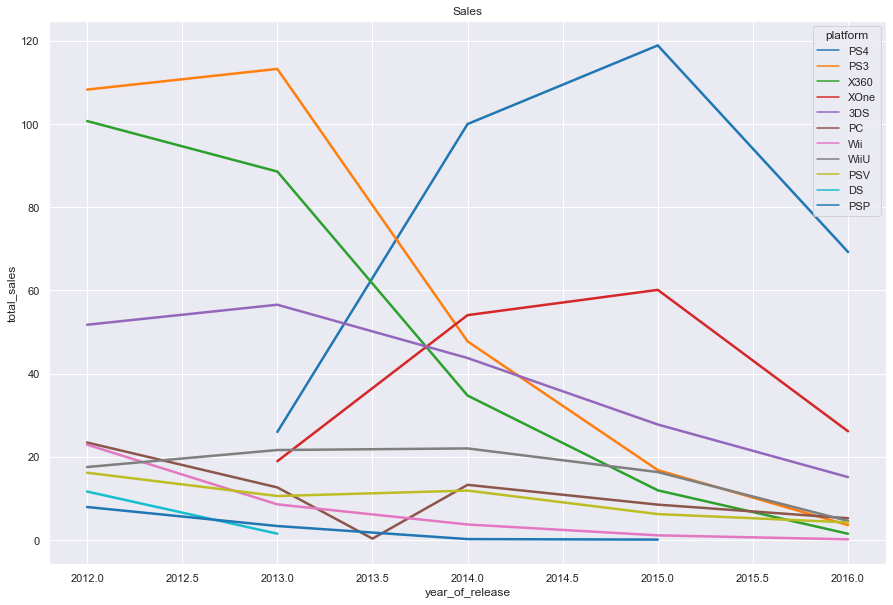

In [42]:
f, ax = plt.subplots(figsize=(15, 10))
sns.lineplot(
    x="year_of_release",
    y="total_sales",
    hue="platform",
    data=actual_total_sales_by_platform_per_year,
    palette="tab10",
    linewidth=2.5,
)
ax.set_title("Sales")

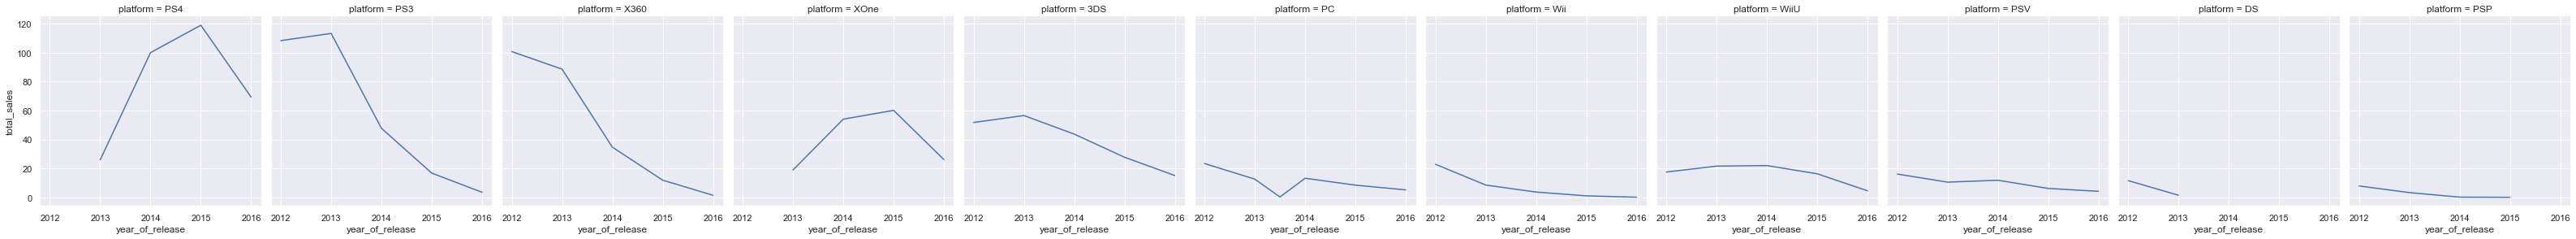

In [43]:
sns.relplot(
    data=actual_total_sales_by_platform_per_year,
    x="year_of_release",
    y="total_sales",
    col="platform",
    kind="line",
    legend="full",
    height=4,
)

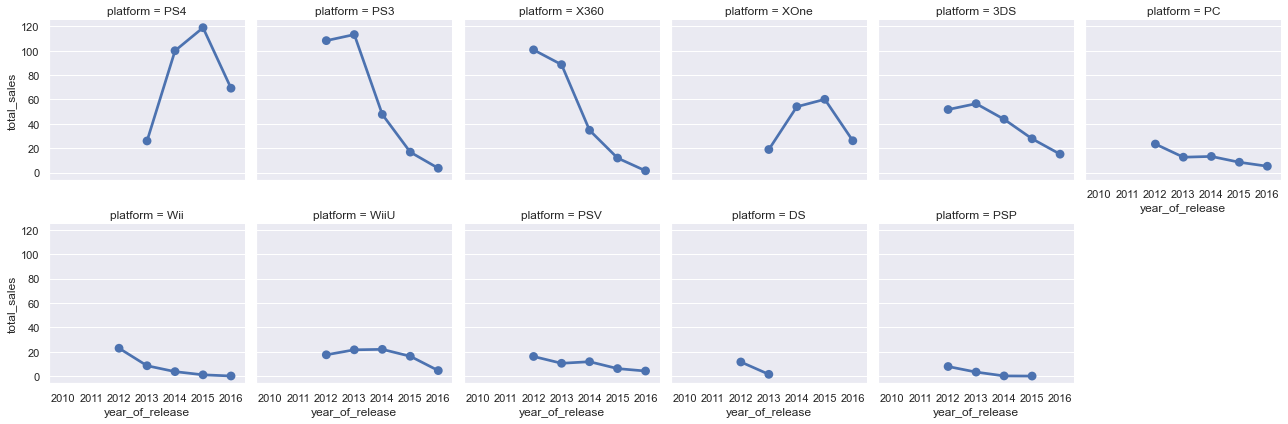

In [44]:
g = sns.FacetGrid(
    actual_total_sales_by_platform_per_year, col="platform", col_wrap=6, height=3
)
g.map(
    sns.pointplot,
    "year_of_release",
    "total_sales",
    order=[2010, 2011, 2012, 2013, 2014, 2015, 2016],
)

Мы видим, что в первые год-два после выхода новых поколений консолей (например, PS4 или XOne) происходил рост продаж: игроки приобретали недавно вышедшие продукты и новинки игровой индустрии. После 2015 года произошло резкое снижение в продаже игр. Однако, согласно исходным данным, сведения за 2016 не полные, следовательно, имеет смысл не придавать большого значения снижению продаж в 2016 году, и предполагать, что дальше продажи также будут расти.

In [45]:
actual_total_sales_by_platform_per_year[
    actual_total_sales_by_platform_per_year.year_of_release == 2015
]

,platform,year_of_release,total_sales
20,PS4,2015.0,118.90
48,XOne,2015.0,60.14
3,3DS,2015.0,27.78
16,PS3,2015.0,16.82
39,WiiU,2015.0,16.35
44,X360,2015.0,11.96
11,PC,2015.0,8.52
29,PSV,2015.0,6.25
34,Wii,2015.0,1.14
25,PSP,2015.0,0.12


Выберем 7 потенциально прибыльных и популярных платформ по состоянию на конец 2015 г.:

* PS4 (Sony Playstation 4) - 119 млн. проданных копий игр;
* XOne (Xbox One) - 60 млн. проданных копий игр;
* 3DS (Nintendo 3DS) - 28 млн. проданных копий игр;
* PS3 (Sony Playstation 3) - 17 млн. проданных копий игр;
* WiiU (Wii U)  - 16 млн. проданных копий игр;
* X360 (Xbox 360)  - 12 млн. проданных копий игр;
* PC (personal computer)  - 9 млн. проданных копий игр.

Наиболее популярные консоли PS4 и XOne - это перспективные и вышедшие не так давно консоли нового поколения (по состоянию на 2017 г.). Планируется выпуск большого количества эксклюзивных игр. Что касается остальных консолей: Nintendo 3DS, Sony Playstation 3, Wii U - они неизбежно теряют свою популярность, и либо уже были выпущены новые версии консолей (как для PlayStation 3), либо будут выпущены в 2017 году, поэтому рассматривать их не столь целесообразно.

Построим график «ящик с усами» по глобальным продажам игр в разбивке по перспективным платформам.

Text(0.5, 1.0, 'Boxplots by platform')

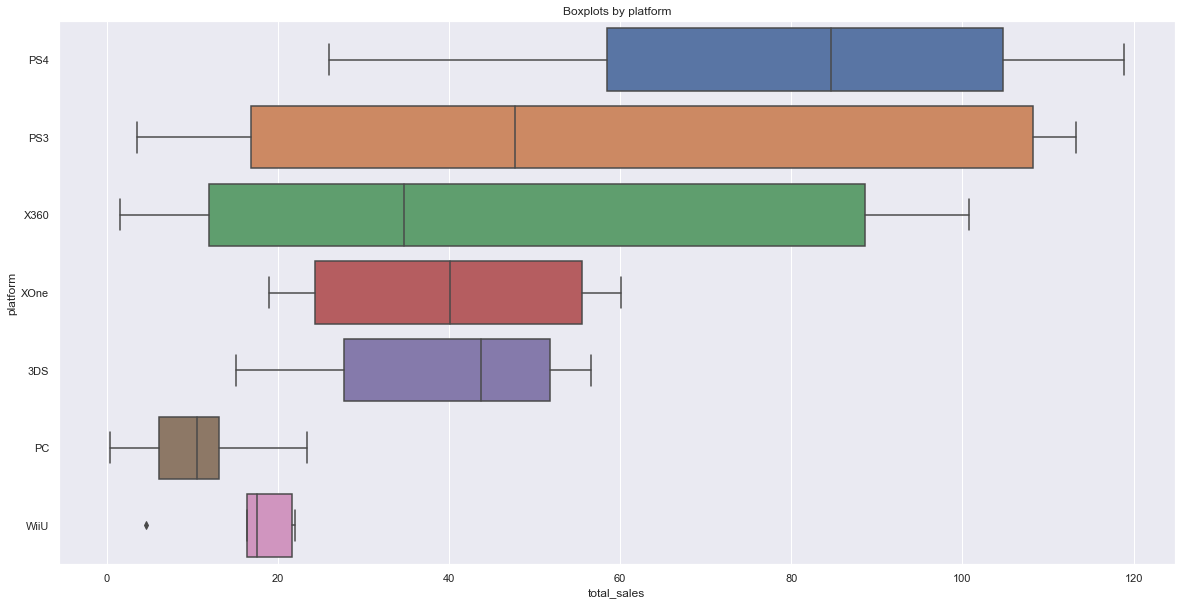

In [46]:
f, ax = plt.subplots(figsize=(20, 10))
sns.boxplot(
    x="total_sales",
    y="platform",
    data=actual_total_sales_by_platform_per_year[
        actual_total_sales_by_platform_per_year.platform.isin(
            ["PS4", "XOne", "3DS", "PS3", "WiiU", "X360", "PC"]
        )
    ],
)
ax.set_title("Boxplots by platform")

Медианное значение по наиболее популярной платформе PS4 составляет примерно 85 млн. копий в год, что существенно выше медианных значений по другим платформам, которые колеблются в районе 30-50 млн. копий.

В 2010 году на пике популярности были платформы X360 и PS3, тогда по этим платформам были достигнуты максимальные значения по продажам игр. PS4, XOne вышли на пик популярности в 2015 году, тогда были достигнуты значения правых усов боксплотов по этим платформам.

Межквартильный размах значений по PS3 и X360 около 80 млн., это обуславливается тем, что эти платформы несколько лет назад были на пике популярности, а к 2015 году продажи игр по этим платформам значительно упали, т.к. вышли новые поколения консолей.

Минимальные значения (левые усы боксплота), как правило, близки к нулю, а максимальные по различным платформам отличаются. В среднем можно сказать, что ежегодные продажи игр по платформам вариьируются от 20 до 125 млн. копий - это достаточно большой разброс.

Далее посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами по платформе PS4.

In [47]:
def correlation_matrix(dataframe, platform, columns):
    dataframe = dataframe.loc[dataframe["platform"] == platform, columns]
    corr = dataframe.corr()
    mask = np.triu(np.ones_like(corr, dtype=bool))
    f, ax = plt.subplots(figsize=(13, 9))
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    sns.heatmap(
        corr,
        mask=mask,
        cmap=cmap,
        vmax=0.99,
        center=0,
        square=True,
        linewidths=0.5,
        cbar_kws={"shrink": 0.5},
        annot=True,
    )
    ax.set_title(f"Correlation matrix by platform {platform}")

In [48]:
def scatter(dataframe, platform, y, x, size):
    f, ax = plt.subplots(figsize=(20, 10))
    sns.scatterplot(
        data=dataframe.loc[dataframe["platform"] == platform],
        x=x,
        y=y,
        hue=size,
        size=size,
        sizes=(50, 500),
    )
    ax.set_title(f"Scatterplot of sales by platform {platform}")

In [49]:
def pairplot(dataframe, platform, columns):
    sns.pairplot(dataframe.loc[dataframe["platform"] == platform, columns])

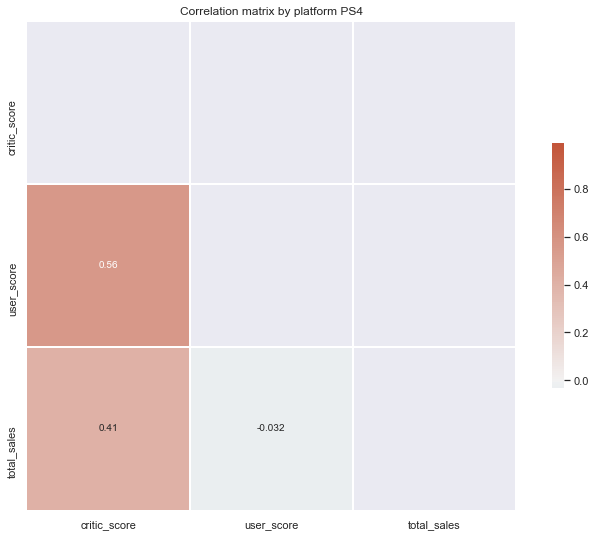

In [50]:
correlation_matrix(
    actual_games_df, "PS4", ["critic_score", "user_score", "total_sales"]
)

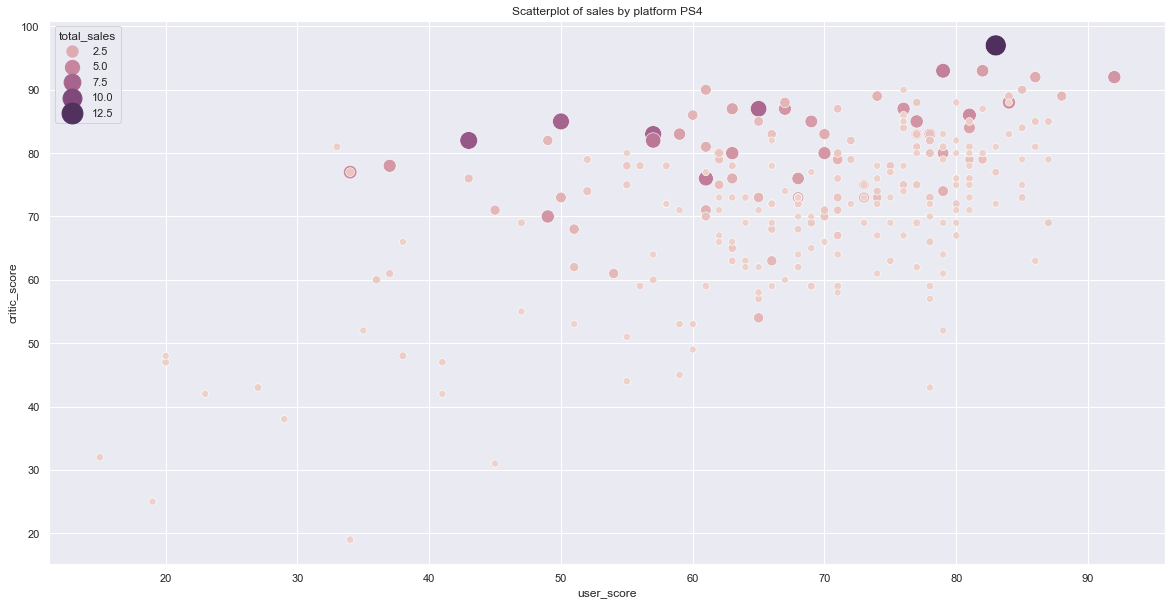

In [51]:
scatter(actual_games_df, "PS4", "critic_score", "user_score", "total_sales")

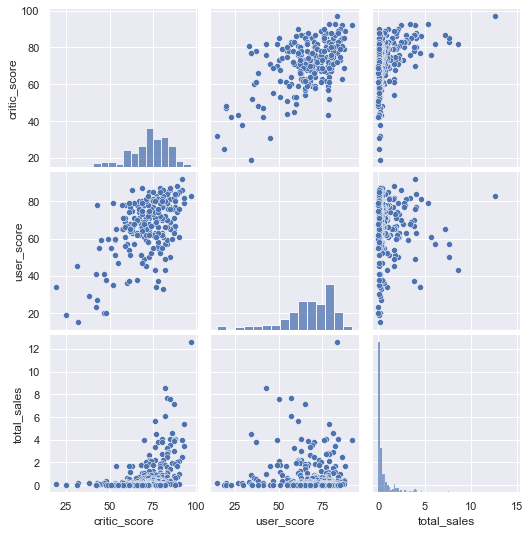

In [52]:
pairplot(actual_games_df, "PS4", ["critic_score", "user_score", "total_sales"])

Можно сказать, что существует небольшая корреляция между продажами и оценкой критиков, ее значение равно 0.39. Согласно матрице корреляций, взаимосвязь между продажами и оценкой пользователей достаточно небольшая, т.к. значение составляет всего -0.021. На диаграмме рассеивания также видно, что чем выше находится наблюдение, тем выше значение critic_score, тем, как правило, больше размер, который отражает число продаж.

Также проанализируем данные по другим платформам: 

In [53]:
def corr(dataframe, platform, columns, y, x, size):
    correlation_matrix(dataframe, platform, columns)
    scatter(dataframe, platform, y, x, size)
    pairplot(dataframe, platform, columns)

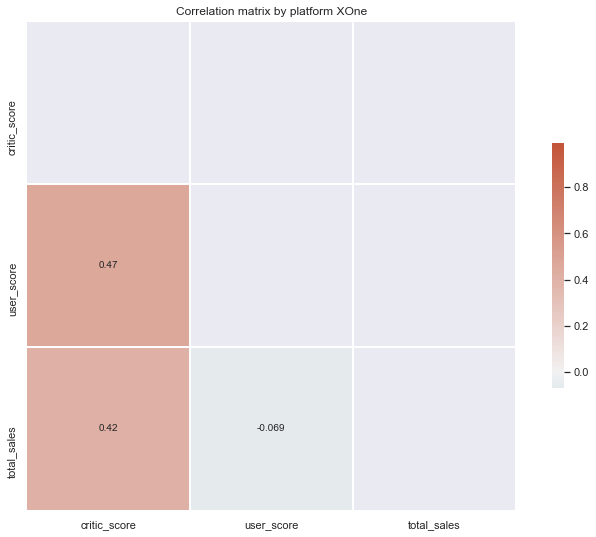

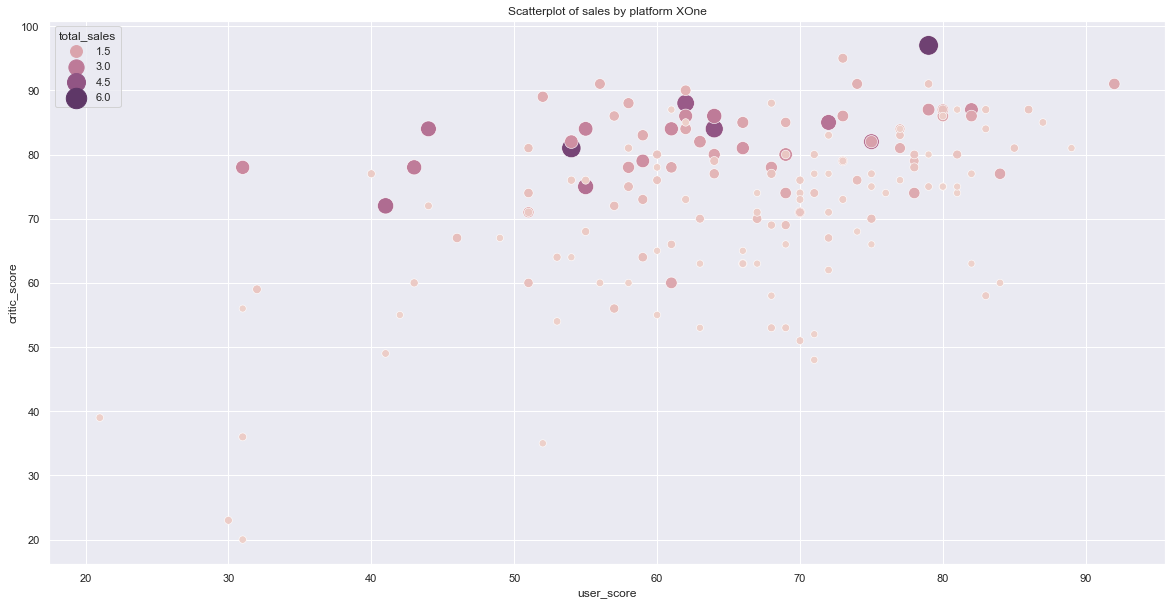

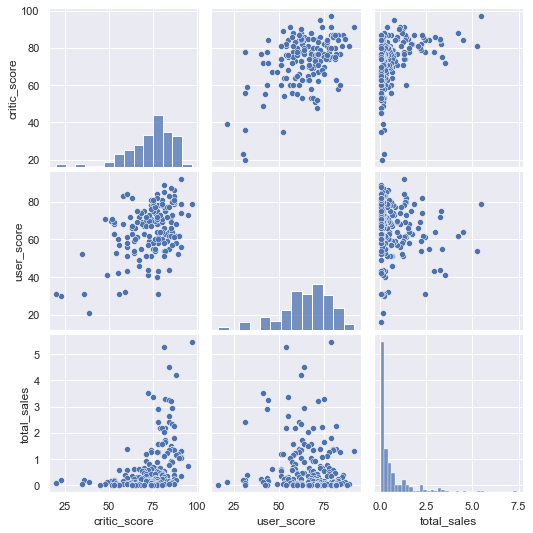

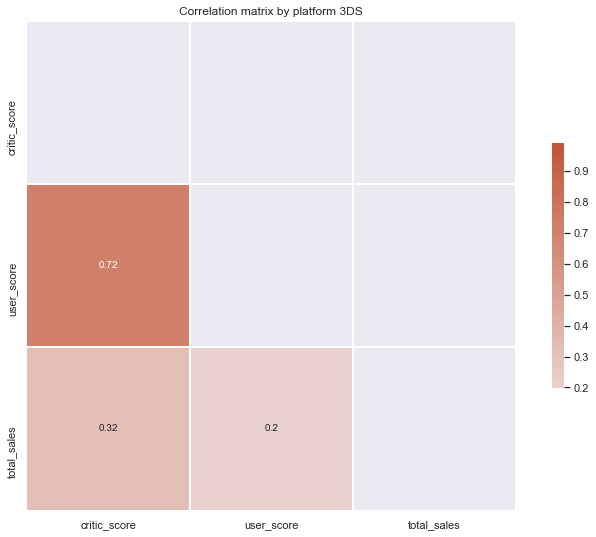

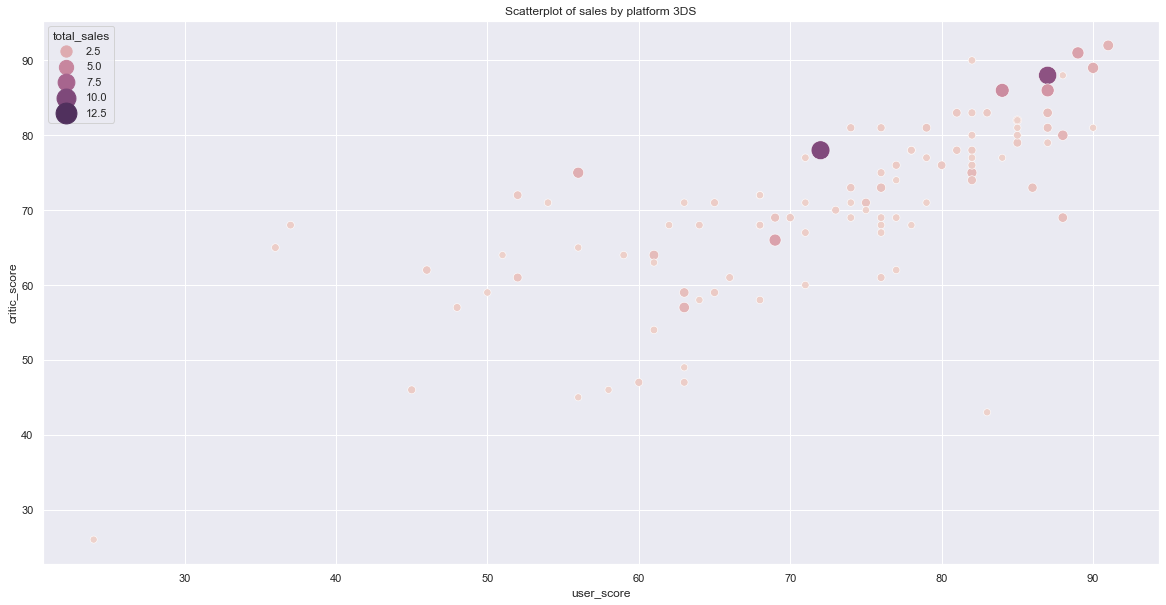

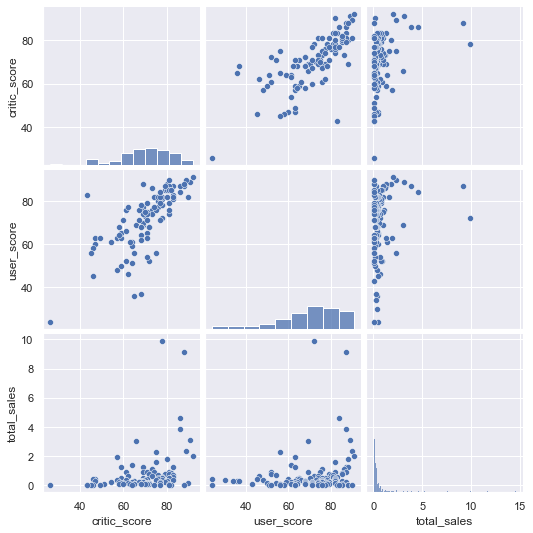

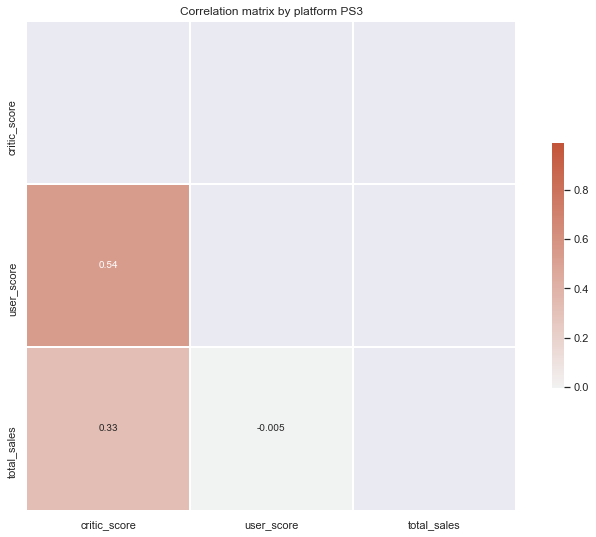

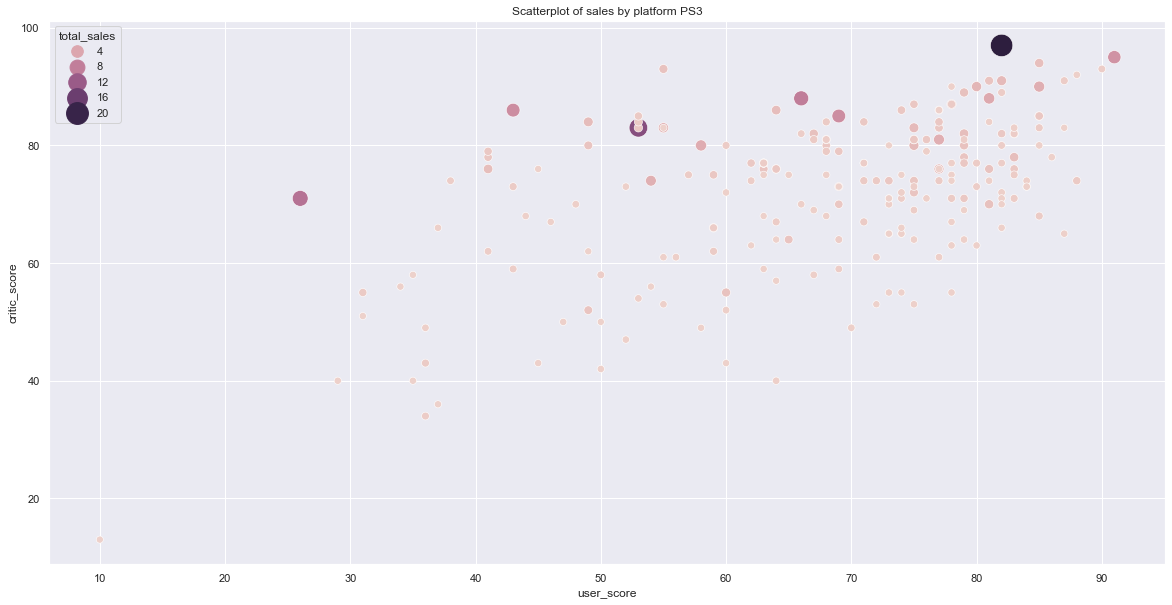

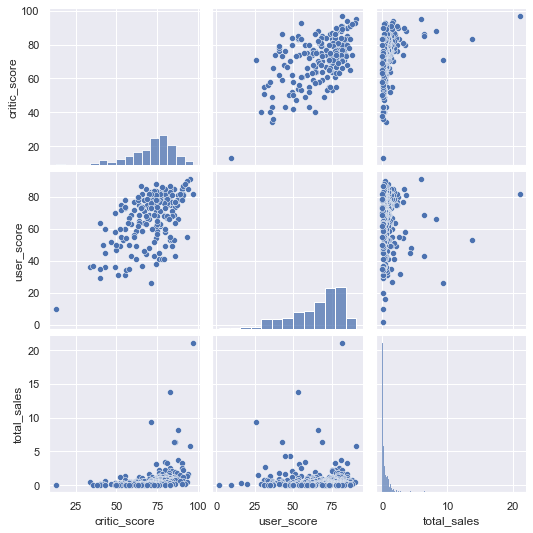

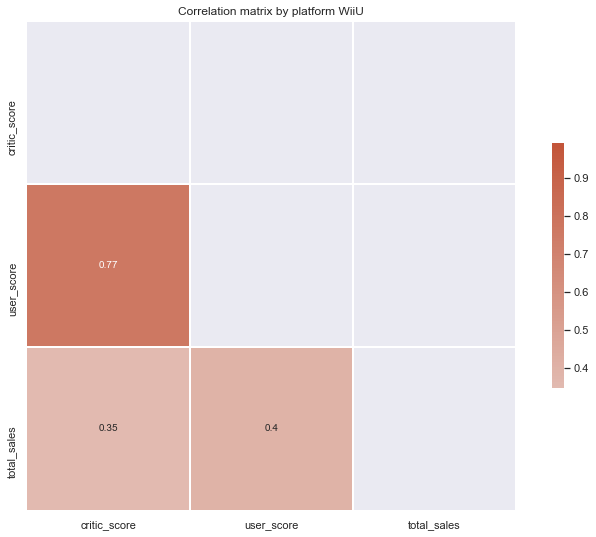

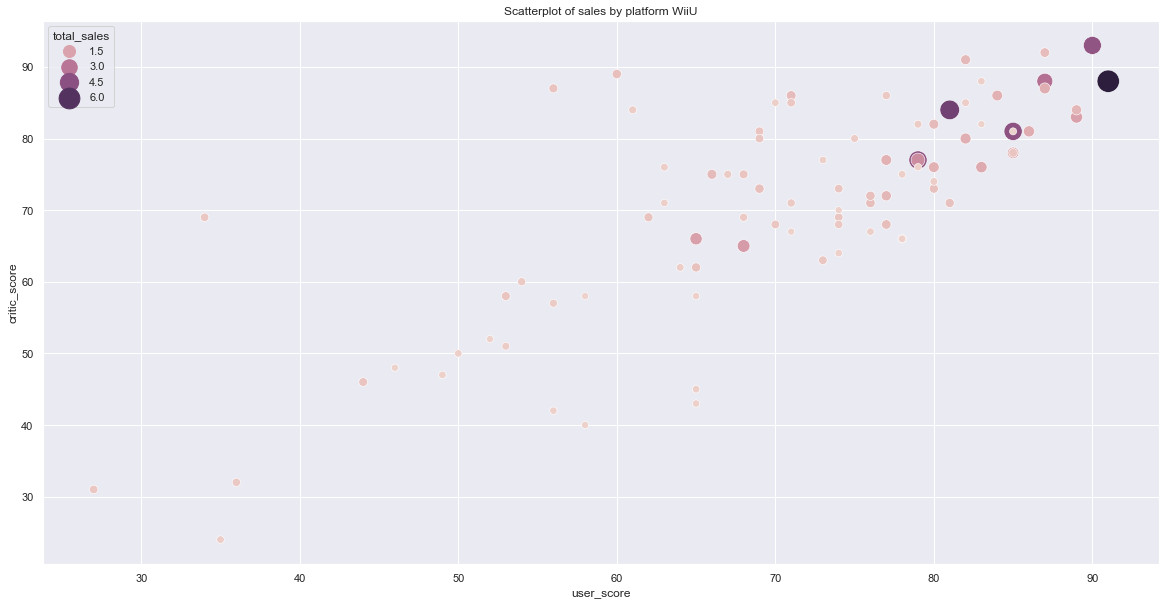

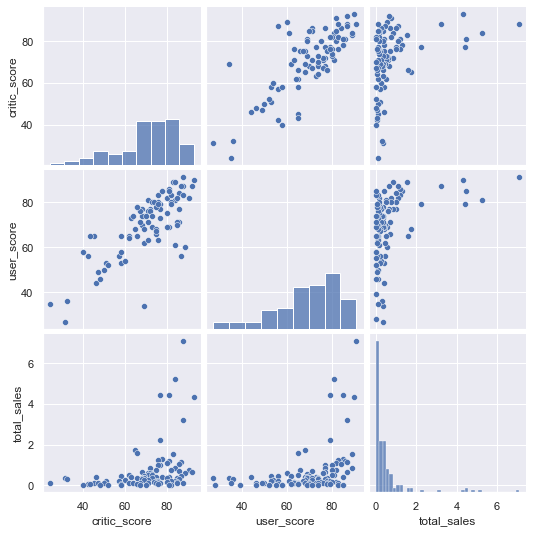

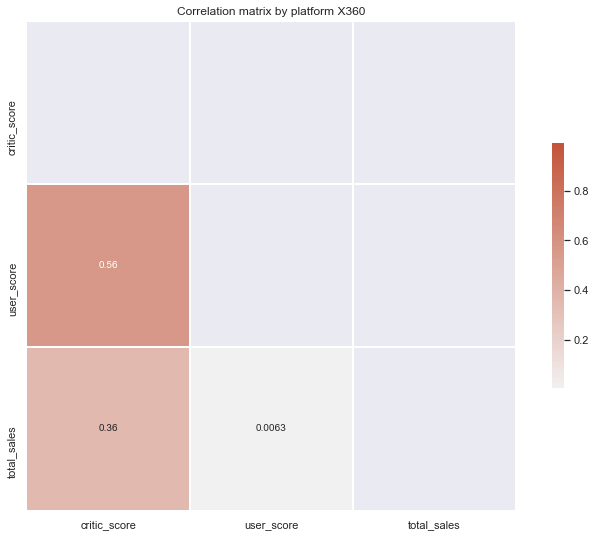

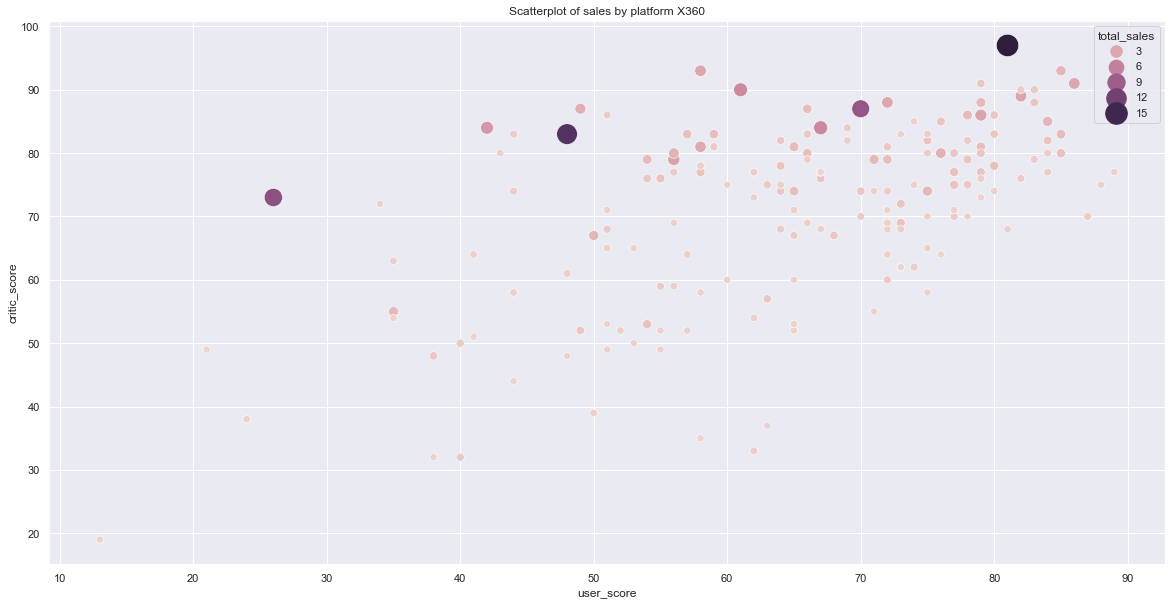

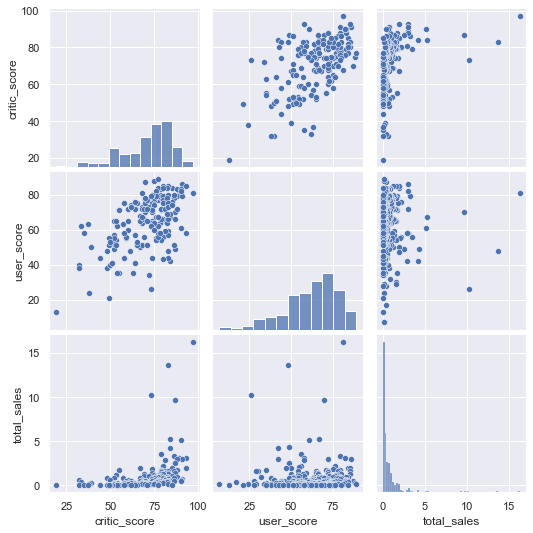

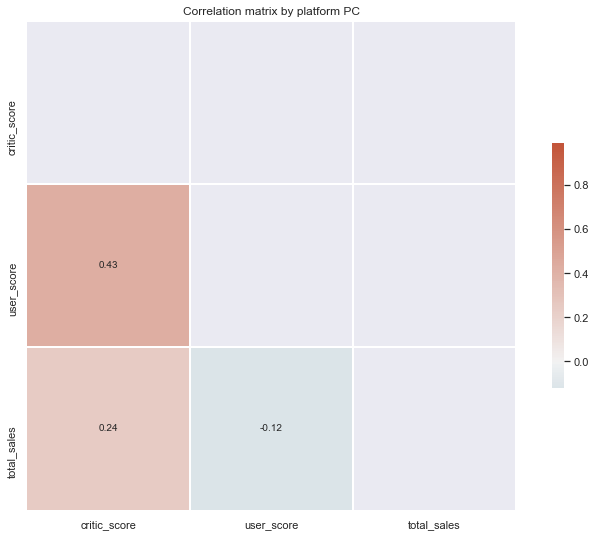

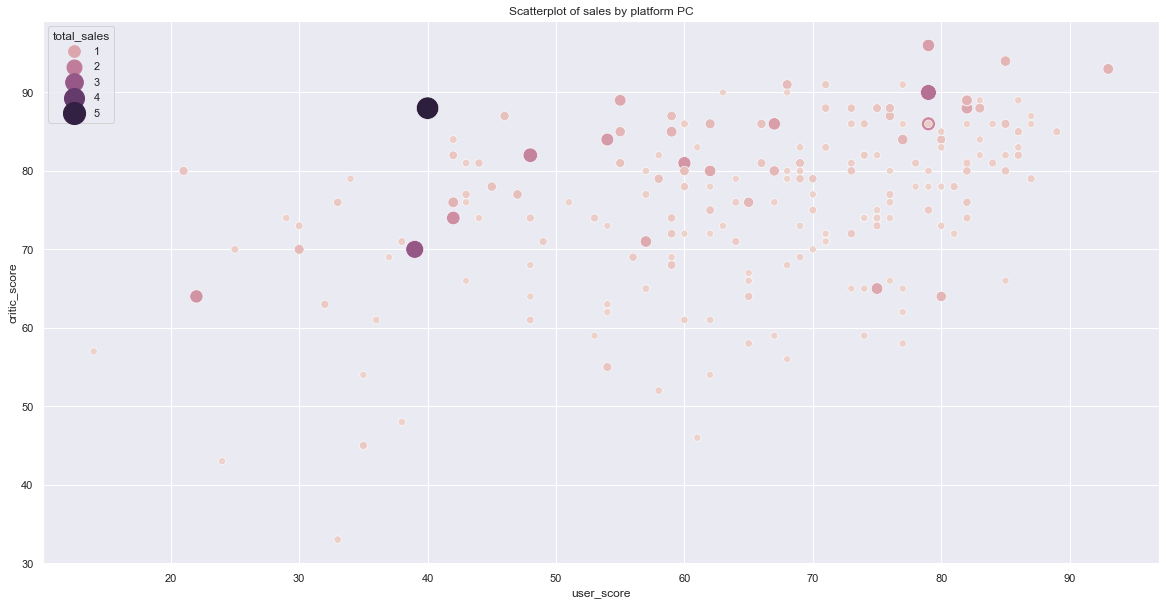

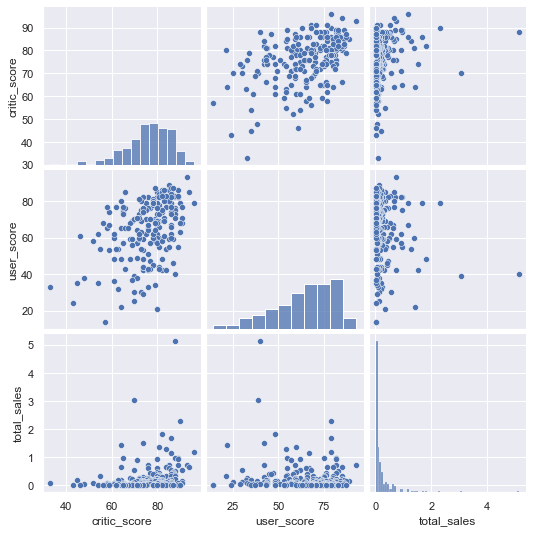

In [54]:
for platform in ["XOne", "3DS", "PS3", "WiiU", "X360", "PC"]:
    corr(
        actual_games_df,
        platform,
        ["critic_score", "user_score", "total_sales"],
        "critic_score",
        "user_score",
        "total_sales",
    )

Ситуация по другим платформам примерно такая же: корреляция переменной critic_score и total_sales слабая, но тем не менее она есть. А значение переменной user_score практически не влияет на значение переменной total_sales. Выделяется разве что PC, т.к. здесь корреляция составляет всего 0.24.

Полученные результаты можно объяснить тем, что в некоторых случаях люди все же опираются и выбирают игры по на отзывам критиков, и в случае положительной рецензии все же скорее покупают игры. И наоборот, меньше покупают в случае отрицательных рецензий. 

Отзывы пользователей наоборот не оказывают какого-либо влияния на то, будут ли покупать игру или нет. Полученная отрицательная корреляция вероятнее всего была получена случайно, т.к. сложно предположить, что люди покупают игры вопреки всем положительным отзывам других людей и не покупают игры при наличии большого количества отрицательных отзывов.

Посмотрим на общее распределение игр по жанрам.

In [55]:
actual_games_by_genre = (
    actual_games_df.pivot_table(index=["genre"], values="total_sales", aggfunc="sum")
    .reset_index()
    .sort_values(by="total_sales", ascending=False)
)

Text(0.5, 1.0, 'Barplot of sales by genres')

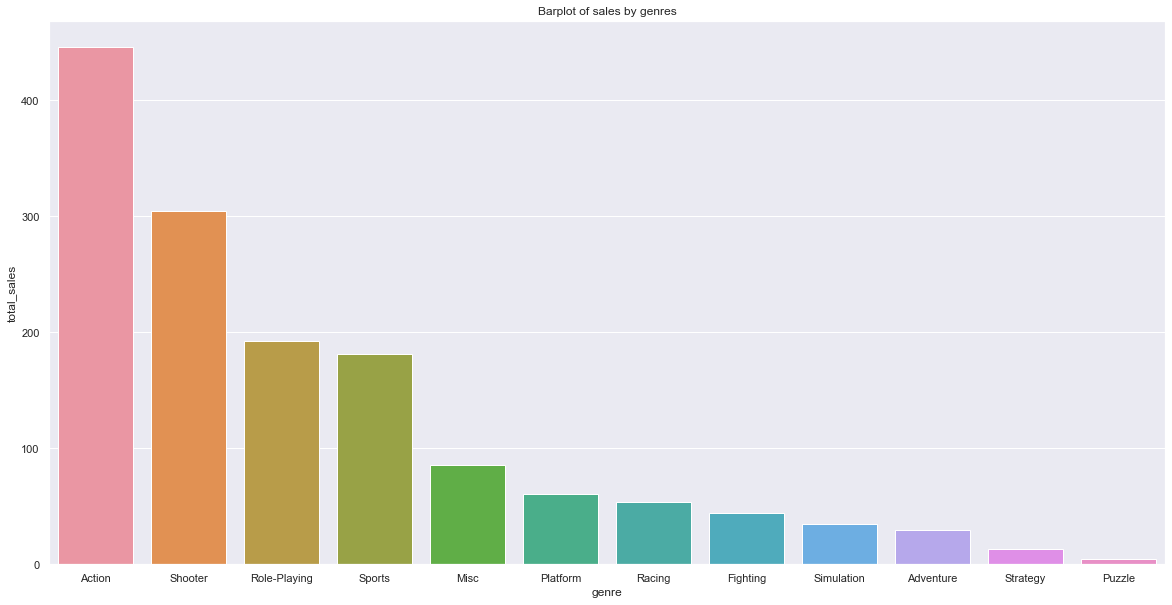

In [56]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="genre", y="total_sales", data=actual_games_by_genre)
ax.set_title("Barplot of sales by genres")

Наибольшее число продаж приходится на наиболее динамичные жанры: Action, Shooter, Sports, Role-Playing. Эти игры имеют наибольшую популярность среди игроков ввиду простоты, динамичности и, как правило, наличия мультиплеера и возможности игры с друзьями.

Однако, можно предположить, что жанр Role-Playing занял 3 место благодаря Японии, т.к. предположительно, там очень любят игры этого жанра.

### Вывод

Мы выяснили, что распределение релизов игр по годам неравномерно: до 2000х годов производилось не так много игр. Начиная с 2000х годов, число релизов игр стало увеличиваться и достигло своего пика в интервале с 2005 г. по 2010 г. Затем количество релизов немного снизилось - это может быть связано с тем, что к играм предъявляются все большие требования, и процесс их создания становится все более технически сложным, поэтому, возможно, разработчикам требуется больше времени.

В среднем новые новые поколения консолей выходт каждые 8-10 лет, однако, из этого не следует, что продажа игр на предыдущие поколении практически сразу прекращается.

Также нам удалось выделить актуальный период и наиболее перспективные платформы. В качестве периода мы приняли 2012 год и позднее, а актуальные платформы:

* PS4 (Sony Playstation 4);
* PS3 (Sony Playstation 3);
* X360 (Xbox 360);
* 3DS (Nintendo 3DS);
* XOne (Xbox One);
* WiiU (Wii U);
* PC (personal computer).

С помощью матрицы корреляций мы выяснили, что есть слабая взаимосвязь между оценками критиков и продажами по каждой из перспективных платформ (значения корреляций варьируются в диапазоне от 0.24 до 0.39). А взаимосвязь между оценками игроков и продажами почти отсутствует.

Проанализировав распределение продажи игр по жанрам, можно отметить, что наибольшее число продаж приходится на наиболее динамичные жанры: Action, Shooter, Role-Playing, Sports, Misc. Эти игры имеют наибольшую популярность среди игроков ввиду простоты, динамичности и, как правило, наличия мультиплеера и возможности игры с друзьями.

## Портрет пользователя каждого региона <a class="anchor" id="fifth-bullet"></a>

Определим для пользователя каждого региона (NA, EU, JP):

* самые популярные платформы (топ-5). Опишем различия в долях продаж;
* самые популярные жанры (топ-5) и опишем различия;
* влияет ли рейтинг ESRB на продажи в отдельном регионе.

In [57]:
platforms_by_na_region = (
    actual_games_df.pivot_table(
        index=["platform"], values=["na_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("na_sales", ascending=False)
)

In [58]:
platforms_by_na_region["proportion"] = round(
    platforms_by_na_region["na_sales"] / actual_games_df.na_sales.sum(), 2
)

In [59]:
platforms_by_na_region.head(5)

,platform,na_sales,proportion
9,X360,140.57,0.24
4,PS4,108.74,0.18
3,PS3,103.74,0.17
10,XOne,93.12,0.16
0,3DS,55.49,0.09


Рейтинг продаж для Северной Америки:
1. X360 - 0.24;
2. PS4 - 0.18;
3. PS3 - 0.17;
4. XOne - 0.16;
5. 3DS - 0.09.

In [60]:
platforms_by_eu_region = (
    actual_games_df.pivot_table(
        index=["platform"], values=["eu_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("eu_sales", ascending=False)
)

In [61]:
platforms_by_eu_region["proportion"] = round(
    platforms_by_eu_region["eu_sales"] / actual_games_df.eu_sales.sum(), 2
)

In [62]:
platforms_by_eu_region.head()

,platform,eu_sales,proportion
4,PS4,141.09,0.28
3,PS3,107.27,0.21
9,X360,74.89,0.15
10,XOne,51.59,0.10
0,3DS,42.83,0.08


Для европейского региона (eu) топ платформ будет выглядеть следующим образом:
1. PS4 - 0.28;
2. PS3 - 0.21;
3. X360 - 0.15;
4. XOne - 0.10;
5. 3DS - 0.08.

In [63]:
platforms_by_jp_region = (
    actual_games_df.pivot_table(
        index=["platform"], values=["jp_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("jp_sales", ascending=False)
)

In [64]:
platforms_by_jp_region["proportion"] = round(
    platforms_by_jp_region["jp_sales"] / actual_games_df.jp_sales.sum(), 2
)

In [65]:
platforms_by_jp_region.head()

,platform,jp_sales,proportion
0,3DS,87.79,0.46
3,PS3,35.29,0.18
6,PSV,21.04,0.11
4,PS4,15.96,0.08
8,WiiU,13.01,0.07


Для Японии рейтинг продаж по платформам выглядит следующим образом:
1. 3DS - 0.46;
2. PS3 - 0.18;
3. PSV - 0.11;
4. PS4 - 0.08;
5. WiiU - 0.07.

Как мы видим, на Европейском рынке лидируют игры на PS4, PS3, после которых расположилась консоль от Майкрософт - Xbox One. 

В Японии больше предпочитают играть на портативных консолях - 3DS, PSV. Вероятнее всего, японцы больше времени тратят на игры, а потому им важна портативность игровых девайсов.

В Северной Америке больше любят консоль собственного производства Xbox 360, и это несмотря на то, что рынок эксклюзивных игр (по крайней мере на текущий момент) остается за Sony Playstation. Xbox One вышла сравнительно недавно, поэтому пока не успела потеснить свою более старую версию на Американском рынке.

Из трёх регионов необычнее всего выглядит Япония: они отдают предпочтение портативным консолям. Европа предпочитает консоли от Sony, а Америка - консоль собственного производста Xbox 360.

Далее проанализируем самые популярные жанры (топ-5) по регионам.

In [66]:
genre_by_na_region = (
    actual_games_df.pivot_table(
        index=["genre"], values=["na_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("na_sales", ascending=False)
)

In [67]:
genre_by_na_region["proportion"] = round(
    genre_by_na_region["na_sales"] / actual_games_df.na_sales.sum(), 2
)

In [68]:
genre_by_na_region.head()

,genre,na_sales,proportion
0,Action,180.15,0.30
8,Shooter,144.79,0.24
10,Sports,81.53,0.14
7,Role-Playing,64.00,0.11
3,Misc,38.19,0.06


Американский рынок игровой индустрии больше предпочитает игры следующих жанров:

1. Action - 0.30;
2. Shooter - 0.24;
3. Sports - 0.14;
4. Role-Playing - 0.11;
5. Misc - 0.06.

In [69]:
genre_by_eu_region = (
    actual_games_df.pivot_table(
        index=["genre"], values=["eu_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("eu_sales", ascending=False)
)

In [70]:
genre_by_eu_region["proportion"] = round(
    genre_by_eu_region["eu_sales"] / actual_games_df.eu_sales.sum(), 2
)

In [71]:
genre_by_eu_region.head()

,genre,eu_sales,proportion
0,Action,161.70,0.32
8,Shooter,113.47,0.22
10,Sports,69.09,0.14
7,Role-Playing,48.53,0.10
6,Racing,27.29,0.05


Европейскому рынку больше по душе игры таких жанров:

1. Action - 0.32;
2. Shooter - 0.22;
3. Sports - 0.14;
4. Role-Playing - 0.10;
5. Racing - 0.05.

In [72]:
genre_by_jp_region = (
    actual_games_df.pivot_table(
        index=["genre"], values=["jp_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("jp_sales", ascending=False)
)

In [73]:
genre_by_jp_region["proportion"] = round(
    genre_by_jp_region["jp_sales"] / actual_games_df.jp_sales.sum(), 2
)

In [74]:
genre_by_jp_region.head()

,genre,jp_sales,proportion
7,Role-Playing,65.44,0.34
0,Action,52.80,0.27
3,Misc,13.10,0.07
9,Simulation,10.41,0.05
2,Fighting,9.44,0.05


Для японского рынка доли продаж выглядят следующим образом:

1. Role-Playing - 0.34;
2. Action - 0.27;
3. Misc - 0.07;
4. Simulation - 0.05;
5. Fighting - 0.05.

В контексте игровых жанров американский рынок мало чем отличается от европейского: на первых трёх местах расположился жанр Action, Shooter, Sports. Жанр Sports очевидно популярен ввиду популярности футбола в Европе и американского футбола в Америке. Это динамичные жанры, где, как правило, имеется мультиплеер и возможность поиграть с друзьями. Доли игр по европейскому и американскому сегментам практически не отличаются.

Японский рынок имеет существенные отличия: наиболее популярными оказались RPG игры. Можно предположить, что такая популярность RPG игр связана с распостраненностью аниме тематики в Японии, и идея прокачивания собственного персонажа вызывает у японского игрового сообщества наибольший интерес. Кроме того, в Японии также любят экшн-игры, симуляторы и файтинги.

Посмотрим влияет ли рейтинг ESRB на продажи в отдельном регионе, но сначала приведем расшифровку рейтингов:

* «E» («Everyone») — «Для всех»;
* E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»;
* «EC» («Early childhood») — «Для детей младшего возраста»;
* «M» («Mature») — «Для взрослых»;
* «RP» («Rating Pending») — «Рейтинг ожидается»;
* «T» («Teen») — «Подросткам».

Посмотрим на продажи по жанрам в американском игровом сегменте. Но сначала заменим в столбце все пропущенные значения на "unknown", так мы избежим потерь в данных при построении сводных таблиц.

In [75]:
actual_games_df.loc[:, 'rating'] = actual_games_df.loc[:, 'rating'].fillna('unknown')

In [76]:
rating_by_na_region = (
    actual_games_df.pivot_table(
        index=["rating"], values=["na_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("na_sales", ascending=False)
)

In [77]:
rating_by_na_region["proportion"] = round(
    rating_by_na_region["na_sales"] / actual_games_df.na_sales.sum(), 2
)

In [78]:
rating_by_na_region

,rating,na_sales,proportion
2,M,231.67,0.39
0,E,114.37,0.19
4,unknown,103.31,0.17
1,E10+,77.93,0.13
3,T,66.02,0.11


Text(0.5, 1.0, 'Barplot of sales by rating in North America')

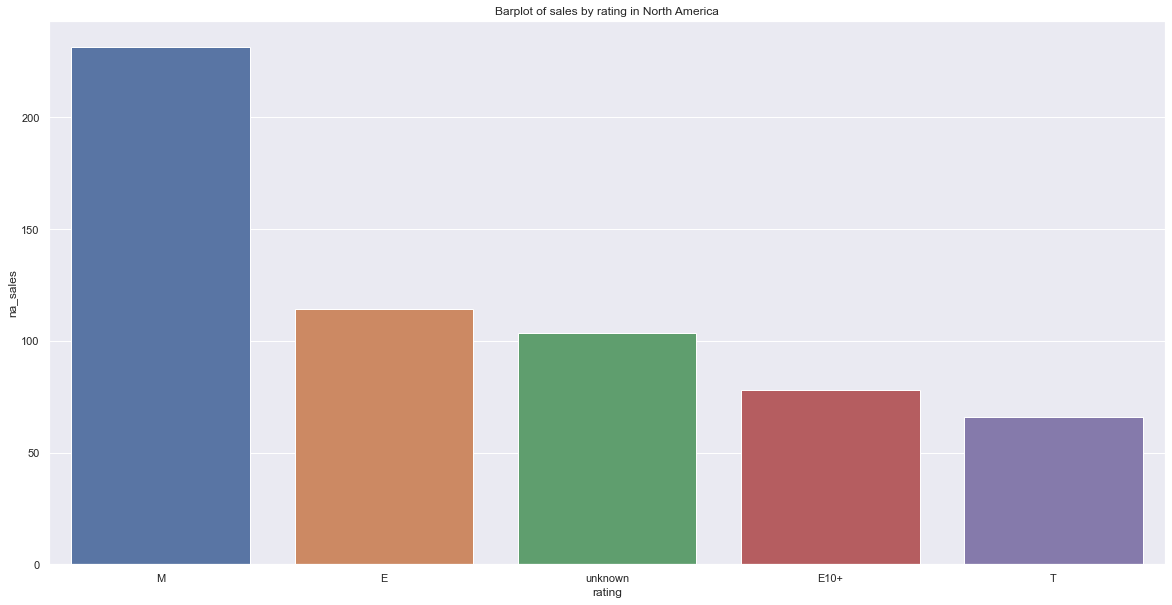

In [79]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="rating", y="na_sales", data=rating_by_na_region)
ax.set_title("Barplot of sales by rating in North America")

Наиболее продаваемые игры в американском регионе имеют рейтинг "Для взрослых". После с большим отрывом идут категории "Для всех", категория игр с неизвестным рейтингом, далее следуют категории "Для всех от 10 лет и старше", "Подросткам".

Проанализируем данные по европейскому рынку игр.

In [80]:
rating_by_eu_region = (
    actual_games_df.pivot_table(
        index=["rating"], values=["eu_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("eu_sales", ascending=False)
)

In [81]:
rating_by_eu_region["proportion"] = round(
    rating_by_eu_region["eu_sales"] / actual_games_df.eu_sales.sum(), 2
)

In [82]:
rating_by_eu_region

,rating,eu_sales,proportion
2,M,194.44,0.38
0,E,113.03,0.22
4,unknown,91.50,0.18
1,E10+,57.25,0.11
3,T,52.96,0.10


Text(0.5, 1.0, 'Barplot of sales by rating in Europe')

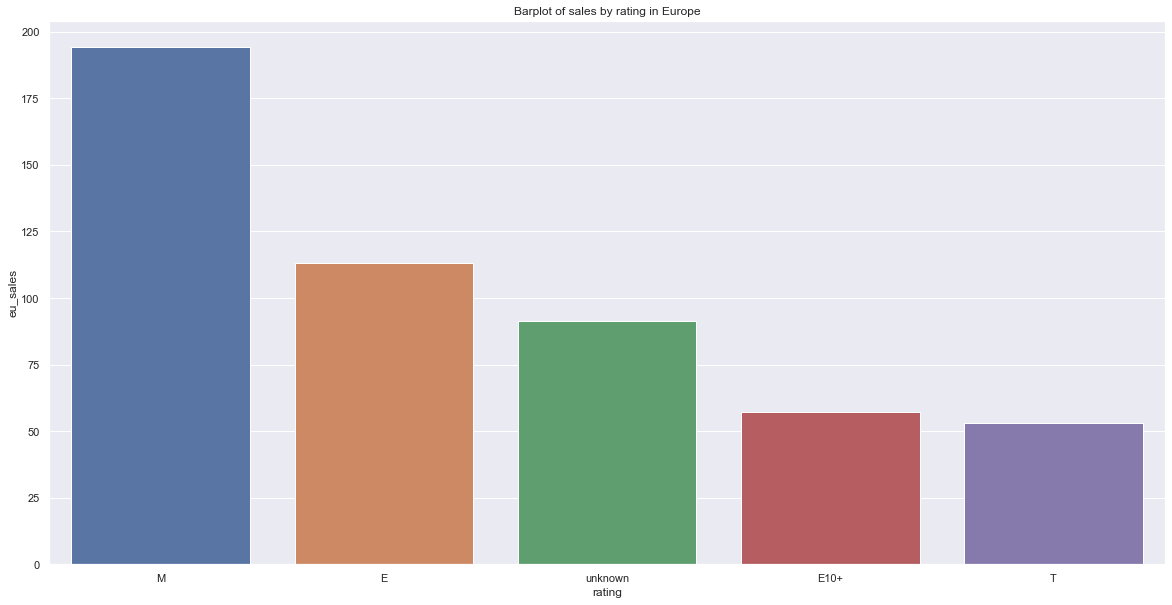

In [83]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="rating", y="eu_sales", data=rating_by_eu_region)
ax.set_title("Barplot of sales by rating in Europe")

По европейскому рынку получилась такая же ситуация, как и по американскому: на первом месте по продажам игры с рейтингом "Для взрослых". После с существенным отрывом идут категории "Для всех", неизвестный рейтинг, "Для всех от 10 лет и старше", "Подросткам".

Проанализируем японский рынок:

In [84]:
rating_by_jp_region = (
    actual_games_df.pivot_table(
        index=["rating"], values=["jp_sales"], aggfunc="sum", fill_value=0
    )
    .reset_index()
    .sort_values("jp_sales", ascending=False)
)

In [85]:
rating_by_jp_region["proportion"] = round(
    rating_by_jp_region["jp_sales"] / actual_games_df.jp_sales.sum(), 2
)

In [86]:
rating_by_jp_region

,rating,jp_sales,proportion
4,unknown,109.08,0.57
0,E,28.33,0.15
3,T,26.02,0.13
2,M,21.20,0.11
1,E10+,8.19,0.04


Text(0.5, 1.0, 'Barplot of sales by rating in Japan')

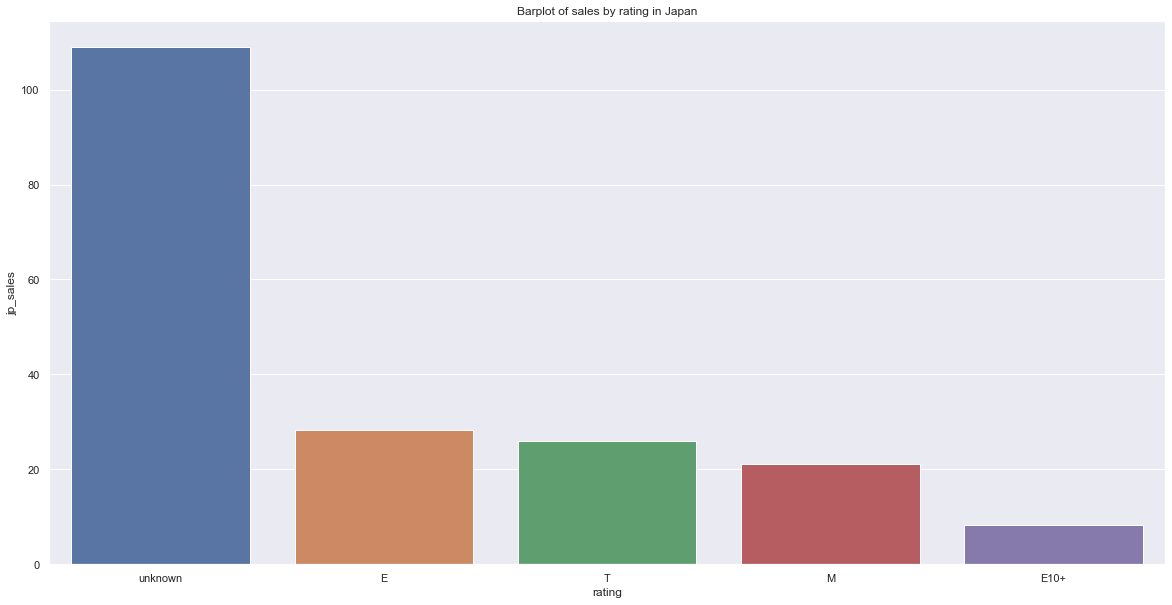

In [87]:
f, ax = plt.subplots(figsize=(20, 10))
sns.barplot(x="rating", y="jp_sales", data=rating_by_jp_region)
ax.set_title("Barplot of sales by rating in Japan")

Ситуация на японском рынке значительно отличается. На первом месте идут игры с неизвестной возрастной категорией. Далее с большим отрывом идёт категория "Для всех", а также игры с возрастными категориями "для подростков", "для взрослых", а наименьшее число продаж у возрастной категории "для всех от 10 лет и старше".

Сложно делать конкретные выводы по японскому рынку относительно возрастных категорий, т.к. известные возрастные категории не сильно отличаются друг от друга, а большинство игр продаются с неизвестной ценовой категорией.

### Вывод

Мы проанализировали основные показатели и составили портреты по каждому из рынков. Рынок консолей для каждого региона уникален. В Северной Америке предпочитают консоли:

1. X360 - 0.24;
2. PS4 - 0.18;
3. PS3 - 0.17;
4. XOne - 0.16;
5. 3DS - 0.09.

Большая часть продаж приходится на консоли их собственного производства Xbox 360, однако, ситуация достаточно быстро может поменяться, т.к. с небольшим отрывом на 2 месте идёт консоль Sony Playstation 4. Вероятно, это происходит потому, что Xbox теряет свои лидирующие позиции на рынке и количество игровых эксклюзивов уменьшается, а на Sony Playstation - наоборот, число эксклюзивных игр растет.

В европейском игровом сегменте больше предпочитают игры на Sony Playstation, а весь рейтинг выглядит так:

1. PS4 - 0.28;
2. PS3 - 0.21;
3. X360 - 0.15;
4. XOne - 0.10;
5. 3DS - 0.08.

Sony Playstation заняла лидирующие позиции, а Xbox наоборот не столь популярен.

Японский сегмент держится особняком, и отличается от остальных. Здесь предпочитают портативные игровые консоли, что, вероятно, связано как с возрастом игроков, так и с временем, которое японцы проводят за играми. Топ платформ по Японии:

1. 3DS - 0.46;
2. PS3 - 0.18;
3. PSV - 0.11;
4. PS4 - 0.08;
5. WiiU - 0.07.

Анализ жанров показал, что американский и европейский сегменты очень похожи. Наибольшей популярностью в американском сегменте пользуются следующие жанры:

1. Action - 0.30;
2. Shooter - 0.24;
3. Sports - 0.14;
4. Role-Playing - 0.11;
5. Misc - 0.06.

Топ-5 жанров для европейского рынка игр:

1. Action - 0.32;
2. Shooter - 0.22;
3. Sports - 0.14;
4. Role-Playing - 0.10;
5. Racing - 0.05.

А Японский рынок имеет ряд отличий:

1. Role-Playing - 0.34;
2. Action - 0.27;
3. Misc - 0.07;
4. Simulation - 0.05;
5. Fighting - 0.05.

Можно предположить, что такая популярность RPG игр связана с распостраненностью аниме тематики в Японии, и идея прокачивания собственного персонажа вызывает у японского игрового сообщества наибольший интерес. Кроме того, в Японии также любят экшн-игры, симуляторы и файтинги.

Что касается возрастных рейтингов, американский и европейский рынок вновь очень похожи и имеют примерно одинаковые пропорции по возрастным рейтингам. Топ-продаж по рейтингам на американском и европейском рынках выглядят следующим образом:

1. M
2. E
3. unknown
4. E10+
5. T

Топ-1 продаж занимают игры с возрастным ограничением "для взрослых". Это объясняется тем, что в Европе и Америке очень распространены Action и Shooter жанры.

Продажи в Японии по возрастному рейтингу отличаются:

1. unknown
2. E
3. T
4. M
5. E10+

Мы видим, что больше всего Японии купленных игр с пропущенной возрастной категорией. Затем с большим отрывом идут категории: "Для всех", "для подростков" и "для взрослых", а наименьшее число продаж у возрастной категории "для всех от 10 лет и старше".

Сложно делать конкретные выводы по японскому рынку относительно возрастных категорий, т.к. известные возрастные категории не сильно отличаются друг от друга, а большинство игр продаются с неизвестной ценовой категорией.

В целом можно сказать, что Японский игровой рынок имеет существенные различия по отношению к Американскому и Европейскому.

## Проверка статистических гипотез <a class="anchor" id="sixth-bullet"></a>

Нам необходимо проверить статистические гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Начнем с первой гипотезы. Сформулируем нулевую гипотезу (H0). H0 всегда формулируется так, чтобы использовать знак равенства. Другими словами, чтобы все значения, полученные эмпирически, не были экстремальными, а лежали там, где ожидаем их найти.

Нулевая гипотеза (H0) в данном случае будет говорить о том, что средние пользовательские рейтинги платформ Xbox One и PC равны. В таком случае, альтернативной гипотезой (H1) будет являться гипотеза о том, что средние пользовательские рейтинги платформ Xbox One и PC отличаются. Такая альтернативная гипотеза называется двухсторонней. Её характерный признак — знак «не равно» в формулировке.

Есть смысл решать вопрос о принятии или отвержении нулевой гипотезы по p-value. Это вероятность получить наблюдаемый или ещё более далёкий от предполагаемого результат при условии, что нулевая гипотеза верна. Если это значение больше 10%, то нулевую гипотезу точно не стоит отвергать. Меньше — возможно, есть основания отвергнуть нулевую гипотезу. Общепринятые пороговые значения — 5% и 1%. В данном случае, примем p-value в размере 5%.

Для проверки гипотезы мы будем использовать t-критерий Стьюдента. t-критерий Стьюдента — общее название для статистических тестов, в которых статистика критерия имеет распределение Стьюдента. Наиболее часто t-критерии применяются для проверки равенства средних значений в двух выборках. Все разновидности критерия Стьюдента являются параметрическими и основаны на дополнительном предположении о нормальности выборки данных.

Однако, согласно центральной предельной теореме (ЦПТ), мы можем быть уверены, что выборочное распределение выборочного среднего из любой генеральной совокупности распределено нормально вокруг среднего этой генеральной совокупности.

Определим, являются ли выборки независимыми или же зависимыми. В случае парных выборок имеются пары наблюдений (измерений) одного и того же объекта. Два раза измеряется одно и то же. В случае независимых выборок каждое наблюдение соответствует отдельному объекту, т.е. измеряются разные объекты. В нашем случае наши выборки независимы, поэтому воспользуемся методом scipy.stats.ttest_ind().

In [88]:
def is_different_by_ttest(
    dataframe,
    list_of_features,
    values_to_compare,
    by,
    alpha=0.05,
    eq_var=True,
    ddof=None,
):
    """Функция выявляет отличия в средних каждой 
    из двух выборок на основе t-критерия Стьюдента
    Аргументы:
    dataframe - таблица с данными;
    list_of_features - список фичей, по которым требуется выполнить анализ;
    by - столбец, по которому необходимо выполнить разбиение на 2 выборки;
    values_to_compare - лист со значениями, по которым происходит сравнение;
    alpha - граница для принятия или отвержения нулевой гипотезы;
    eq_var - различны ли дисперсии. В случае, если относительная разность
    более 5%, значение принимается как False"""

    for feature in list_of_features:
        if ddof:
            var1 = dataframe.loc[
                (dataframe[by] == values_to_compare[0])
                & (dataframe[feature] != 0)
                & (dataframe[feature].notna())
            ][[feature]].var(ddof=1)
            var2 = dataframe.loc[
                (dataframe[by] == values_to_compare[1])
                & (dataframe[feature] != 0)
                & (dataframe[feature].notna())
            ][[feature]].var(ddof=1)
        else:
            var1 = dataframe.loc[
                (dataframe[by] == values_to_compare[0])
                & (dataframe[feature] != 0)
                & (dataframe[feature].notna())
            ][[feature]].var()
            var2 = dataframe.loc[
                (dataframe[by] == values_to_compare[1])
                & (dataframe[feature] != 0)
                & (dataframe[feature].notna())
            ][[feature]].var()
        if float(abs((var1 - var2) / var2)) > 0.05:
            eq_var = False
        tariff1 = dataframe.loc[
            (dataframe[by] == values_to_compare[0])
            & (dataframe[feature] != 0)
            & (dataframe[feature].notna())
        ][[feature]]
        tariff2 = dataframe.loc[
            (dataframe[by] == values_to_compare[1])
            & (dataframe[feature] != 0)
            & (dataframe[feature].notna())
        ][[feature]]

        results = st.ttest_ind(tariff1, tariff2, equal_var=eq_var)
        print("p-значение:", results.pvalue)
        if results.pvalue < alpha:
            print("Отвергаем нулевую гипотезу, принимаем альтернативную")
        else:
            print("Не получилось отвергнуть нулевую гипотезу")

In [89]:
is_different_by_ttest(actual_games_df, ["user_score"], ["PC", "XOne"], by="platform")

p-значение: [0.62063664]
Не получилось отвергнуть нулевую гипотезу


Мы получили, что вероятность получить такое, или еще более сильное отклонение в разности средних значений составляет 0.62 (62%), а, следовательно, мы не можем отвергнуть нулевую гипотезу и считаем, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

Теперь проверим вторую гипотезу: средние пользовательские рейтинги жанров Action и Sports разные.

Сформулируем H0: нет никаких различий в рейтингах жанров Action и Sports. Альтернативной гипотезой H1 будет гипотеза о том, что средние пользовательские рейтинги жанров Action и Sports разные. Порог для p-value также примем в размере 0.05.

In [90]:
is_different_by_ttest(actual_games_df, ["user_score"], ["Action", "Sports"], by="genre")

p-значение: [2.33720024e-20]
Отвергаем нулевую гипотезу, принимаем альтернативную


Мы получили статистически значимые отличия: вероятность получить такие или еще более значимые отклонения практически равна нулю. В данном случае отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательские рейтинги жанров Action и Sports разные.

### Вывод

Мы проверили две гипотезы:

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Для проверки гипотез мы использовали t-критерий Стьюдента, т.к. t-критерий наиболее часто применяется для проверки равенства средних значений в двух выборках. Основным требованием для применения t-критерия Стьюдента является нормальность распределения. В данном случае мы можем быть уверены, что распределение нормально согласно центральной предельной теореме (ЦПТ): выборочное распределение выборочного среднего из любой генеральной совокупности распределено нормально вокруг среднего этой генеральной совокупности.

Для гипотез была сформулирована нулевая гипотеза (H0): статистически значимых различий между двумя выборками нет, а также альтернативная гипотеза (H1): между двумя выборками были получены статистически значимые различия. В качестве порогового значения мы приняли стандартное значение в 5%.

После проверки первой гипотезы был получен p-уровень, который говорит о том, что вероятность случано получить такое, или еще более сильное отклонение в разности средних значений составляет 0.62 (62%), а, следовательно, мы не можем отвергнуть нулевую гипотезу и считаем, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

В результате проверки второй гипотезы мы получили статистически значимые отличия: вероятность получить такие или еще более значимые отклонения случайно практически равна нулю. В данном случае отвергаем нулевую гипотезу и принимаем альтернативную: средние пользовательские рейтинги жанров Action и Sports разные.

## Общий вывод <a class="anchor" id="seventh-bullet"></a>

Мы проанализировали данные по продажам игр за последние годы. 

При формировании стратегии рекламной компании для каждого региона (Северная Америка, Европа, Япония) важно опираться на полученный портрет пользователя для каждого региона. Так, например, при планировании рекламной кампании в Северной Америке и Европе имеет смысл акцентировать внимание на игровых платформах Xbox и Sony Playstation, и уделять большое внимание таким жанрам как Action, Shooter, Sports.

В Японии приоритеты немного другие: пользователи больше всего любят игровые консоли собственного производства - фирмы Nintendo (3DS), и в целом более заинтересованы в портативных игровых приставках, а любимые жанры - Role-Playing, Action, Misc. Также в Японии очень любят жанры Simulation и Fighting. Этими фактами нельзя пренебрегать при планировании маркетинговой кампании.

При проверке статистических гипотез мы не выявили значимых различий в оценках пользователей по играм для PC и Xbox One, т.е. можно сказать, что вкусовые предопчтения таких пользователей во многом сходятся. Однако, средние пользовательские рейтинги жанров Action и Sports оказались действительно различными, это может быть связано с тем, что пользователи более высоко ценят игры жанра Action, т.к. именно этот жанр находится в топ-2 по всем трем регионам.